<a href="https://colab.research.google.com/github/CYJienn/Introduction-to-Python/blob/main/(Final)Cleaned_Chill_Property_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group Members**

1. Chua Yu Jien (23118637)
2. Lim Jia Lih (24004471)
3. Brayden Chong Jie Rui (23096507)
4. Ong Yi Hao (24004516)
5. Ling Hua Rong (24004492)

# Special Thanks

Change the context here to thank Dr.Muhammad Shahreeza

#1. Design Project

As a group, we come up with a question, **can we accurately predict property prices in Kuala Lumpur based on features like location, size, property type, and furnishing?**

## **Theme**
###Property Listing in Kuala Lumpur

# 2. Data Collection
Once you have decided on a theme, you will need to collect/find data that is relevantto your project. You can use publicly available datasets or collect data on your own. Ensure that your data is relevant, reliable, and sufficient for your project.

## **Dataset**

https://www.kaggle.com/datasets/dragonduck/property-listings-in-kuala-lumpur


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3. Data Preprocessing
After collecting your data, you will need to preprocess it to make it
suitable for machine learning. This may include cleaning, normalization, feature extraction,
and transformation. You must have two tables in your report, as given by the examples
below


* Display the first 5 rows of the dataset to get an initial sense of the data.

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kl_properties.csv')

df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB


* From df.info(), the dataset has has 51787 samples, or row of observation of 8 columns. The number of samples is quite enough. All the columns in the dataset consists of 'float64' and 'object' datatype and there are some missing values in every column except Location.

## Data Cleaning

### Clean Inconsistent Data


#####Cleaning the dataset that has all Kuala Lumpur words, and redundant datas.

In [ ]:
df['Location'] = df['Location'].str.replace('Kuala Lumpur', '').str.strip()
df['Location'] = df['Location'].str.replace(',', '').str.strip()
df['Location'] = df['Location'].str.replace('Klcc', 'KLCC')

df

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,KLCC,"RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,Damansara Heights,"RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,Dutamas,"RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,Cheras,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bukit Jalil,"RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
...,...,...,...,...,...,...,...,...
53878,Bangsar,"RM 5,100,000",5+1,4.0,NaN,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished
53879,Bangsar,"RM 5,000,000",5,4.0,NaN,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished
53880,Bangsar,"RM 5,500,000",5+1,4.0,NaN,Bungalow (Intermediate),Land area : 7168 sq. ft.,Partly Furnished
53881,Wangsa Maju,"RM 480,000",3,2.0,NaN,Condominium (Intermediate),"Built-up : 1,150 sq. ft.",Unfurnished


#####Remove RM and the commas in price column

In [ ]:
#remove RM and the commas in price.

# Assuming your DataFrame is named 'df'
df['Price'] = df['Price'].astype(str)  # Convert to string if not already
df['Price'] = df['Price'].str.replace('RM', '', regex=False)  # Remove 'RM'
df['Price'] = df['Price'].str.replace(',', '', regex=False)  # Remove commas
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert to numeric, handling errors
df['Price'] = df['Price'].round(2)  # Round to 2 decimal places

#####Since car parks may be unrelated, we will remove them


In [ ]:
df = df.drop('Car Parks', axis=1)

### Clean Noisy Data

#####There are areas that are obviously not in Kuala Lumpur, therefore we are trying to clean the noisy data

In [ ]:
kl_districts = ['KLCC', 'Damansara Heights', 'Dutamas', 'Bukit Jalil',
       'Taman Tun Dr Ismail', 'Sri Petaling', 'Bukit Tunku (Kenny Hills)',
       'Mont Kiara', 'Desa ParkCity', 'Bangsar South', 'Sungai Besi',
       'Ampang Hilir', 'Kepong', 'Jalan Klang Lama (Old Klang Road)',
       'KL City', 'KL Sentral', 'Taman Melawati', 'Setapak',
       'City Centre', 'Country Heights Damansara', 'Taman Desa', 'Sentul',
       'Cheras', 'Bangsar', 'Segambut', 'Wangsa Maju', 'Ampang',
       'Sri Hartamas', 'Bukit Kiara', 'Setiawangsa', 'OUG', 'Bukit Bintang',
       'Jalan Sultan Ismail', 'Chan Sow Lin', 'Jalan Kuching',
       'Bandar Menjalara', 'Seputeh', 'KL Eco City', 'Kuchai Lama',
       'Jalan Ipoh', 'Mid Valley City', 'Brickfields', 'Desa Pandan',
       'Desa Petaling', 'Federal Hill', 'Semarak', 'Titiwangsa']

df = df[df['Location'].isin(kl_districts)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51787 entries, 0 to 53882
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       51787 non-null  object 
 1   Price          51549 non-null  float64
 2   Rooms          50216 non-null  object 
 3   Bathrooms      49910 non-null  float64
 4   Property Type  51762 non-null  object 
 5   Size           50771 non-null  object 
 6   Furnishing     45238 non-null  object 
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


#####There are samples that have more bathrooms than rooms, which is unrealistic and can be removed as noisy data

In [ ]:
#Remove all rows that has bathrooms more than rooms

#Also for rooms, please help me to add the values if they got + sign

import re
import numpy as np
import pandas as pd

# Function to sum room values with '+' sign
def sum_rooms(room_string):
    try:
        # Find all numbers using regex
        numbers = re.findall(r'\d+', str(room_string))
        if numbers:
            return sum(int(num) for num in numbers)
        else:
            # Handle cases like "Studio"
            if 'Studio' in str(room_string):
                return 1
            else:
                return np.nan
    except (ValueError, TypeError):
        return np.nan

# Apply the function to the "Rooms" column
df['Rooms'] = df['Rooms'].apply(sum_rooms)

# Convert 'Rooms' column to int64, handling NaNs
df['Rooms'] = df['Rooms'].astype(pd.Int64Dtype())


•Firstly, we would like to remove the outliers in the price column. Any house price below RM10000 will be removed immediately. (Clean outlier)

In [ ]:
# Remove rows where Price <= 10000
df = df[df['Price'] > 10000]

# Display the updated DataFrame (optional)
print(df.head())

              Location      Price  Rooms  Bathrooms         Property Type  \
0                 KLCC  1250000.0      3        3.0    Serviced Residence   
1    Damansara Heights  6800000.0      6        7.0              Bungalow   
2              Dutamas  1030000.0      3        4.0  Condominium (Corner)   
4          Bukit Jalil   900000.0      5        3.0  Condominium (Corner)   
5  Taman Tun Dr Ismail  5350000.0      6        5.0              Bungalow   

                       Size        Furnishing  
0  Built-up : 1,335 sq. ft.   Fully Furnished  
1  Land area : 6900 sq. ft.  Partly Furnished  
2  Built-up : 1,875 sq. ft.  Partly Furnished  
4  Built-up : 1,513 sq. ft.  Partly Furnished  
5  Land area : 7200 sq. ft.  Partly Furnished  


### Clean Incomplete Data

#####Dealing with Missing Values and Null Values

* Identify the total number of missing values using df.isna().sum()

In [ ]:
import numpy as np

df.isna().sum()

,0
Location,0
Price,0
Rooms,1503
Bathrooms,1806
Property Type,0
Size,944
Furnishing,6408


#####Handle missing values at Bathrooms and Car Parks columns

In [ ]:
# Convert bathrooms and car parks to integer
df['Bathrooms'] = df['Bathrooms'].astype('Int64')  # Handles NaN values
df.head()

,Location,Price,Rooms,Bathrooms,Property Type,Size,Furnishing
0,KLCC,1250000.0,3,3,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,Damansara Heights,6800000.0,6,7,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,Dutamas,1030000.0,3,4,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
4,Bukit Jalil,900000.0,5,3,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,Taman Tun Dr Ismail,5350000.0,6,5,Bungalow,Land area : 7200 sq. ft.,Partly Furnished


In [ ]:
import pandas as pd
import numpy as np
import re


def sum_rooms(room_string):
    """
    Extracts numbers from room_string and returns their sum.
    Handles formats like "2+1", "Studio", "4+2 Duplex", etc.
    Returns NaN if extraction fails.
    """

    try:
        # Try to find all numbers using regular expression
        numbers = re.findall(r'\d+', str(room_string))
        if numbers:
            return sum(int(num) for num in numbers)
        else:
            # Handle cases like "Studio"
            if 'Studio' in str(room_string):
                return 1
            else:
                return np.nan
    except (ValueError, TypeError):
        return np.nan

# Apply the function to the "Rooms" column
df['Rooms'] = df['Rooms'].apply(sum_rooms)

# Convert 'Rooms' column to int64, handling NaNs
df['Rooms'] = df['Rooms'].astype(pd.Int64Dtype())

df

,Location,Price,Rooms,Bathrooms,Property Type,Size,Furnishing
0,KLCC,1250000.0,3,3,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,Damansara Heights,6800000.0,6,7,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,Dutamas,1030000.0,3,4,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
4,Bukit Jalil,900000.0,5,3,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,Taman Tun Dr Ismail,5350000.0,6,5,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
...,...,...,...,...,...,...,...
53878,Bangsar,5100000.0,6,4,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished
53879,Bangsar,5000000.0,5,4,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished
53880,Bangsar,5500000.0,6,4,Bungalow (Intermediate),Land area : 7168 sq. ft.,Partly Furnished
53881,Wangsa Maju,480000.0,3,2,Condominium (Intermediate),"Built-up : 1,150 sq. ft.",Unfurnished


In [ ]:
df = df.dropna(thresh=len(df.columns) - 2)

#####Handle missing values at Furnishing column

In [ ]:
df['Furnishing'].unique()

array(['Fully Furnished', 'Partly Furnished', 'Unfurnished', nan,
       'Unknown'], dtype=object)

In [ ]:
# Drop rows where 'Furnishing' is 'Unknown' or NaN
df = df[df['Furnishing'].notna() & (df['Furnishing'] != 'Unknown')]

In [ ]:
print(f"Number of rows with 'Fully Furnished': {df[df['Furnishing'] == 'Fully Furnished'].shape[0]}")
print(f"Number of rows with 'Partly Furnished': {df[df['Furnishing'] == 'Partly Furnished'].shape[0]}")
print(f"Number of rows with 'Unfurnished': {df[df['Furnishing'] == 'Unfurnished'].shape[0]}")

Number of rows with 'Fully Furnished': 13425
Number of rows with 'Partly Furnished': 25353
Number of rows with 'Unfurnished': 5409


In [ ]:
df.isna().sum()

,0
Location,0
Price,0
Rooms,436
Bathrooms,596
Property Type,0
Size,665
Furnishing,0


#####For rooms and bathrooms, since all houses are similar, therefore I try to use the median for the rooms and bathrooms in our dataset.

In [ ]:
import pandas as pd

# Calculate median, mode, and mean for Rooms and Bathrooms by Property Type
property_stats = df.groupby('Property Type').agg({
    'Rooms': [pd.Series.mode, 'median', 'mean'],  # Mode, median, mean of Rooms
    'Bathrooms': [pd.Series.mode, 'median', 'mean']  # Mode, median, mean of Bathrooms
})

# Flatten MultiIndex columns for easier access
property_stats.columns = ['_'.join(col).strip() for col in property_stats.columns.values]
property_stats = property_stats.rename(columns={
    'Rooms_mode': 'Rooms_Mode',
    'Rooms_median': 'Rooms_Median',
    'Rooms_mean': 'Rooms_Mean',
    'Bathrooms_mode': 'Bathrooms_Mode',
    'Bathrooms_median': 'Bathrooms_Median',
    'Bathrooms_mean': 'Bathrooms_Mean'
})

# Display the results
print(property_stats)

# Example usage to fill NaN values in 'Rooms' based on property type
# Assuming you want to use the median:
for property_type in df['Property Type'].unique():
    median_rooms = property_stats.loc[property_type, 'Rooms_Median']
    # Check if median_rooms is NAType before converting to int
    if not pd.isna(median_rooms):
        df.loc[(df['Property Type'] == property_type) & (df['Rooms'].isnull()), 'Rooms'] = int(median_rooms)  # Fill with median, converted to int
    else:
        # Handle NAType (e.g., fill with a default value or drop rows)
        # Here, we fill with 0 as an example, you might need to adjust this
        df.loc[(df['Property Type'] == property_type) & (df['Rooms'].isnull()), 'Rooms'] = 0

# Repeat the above for 'Bathrooms' using the appropriate statistic (mode, median, or mean)

                                        Rooms_Mode  Rooms_Median  Rooms_Mean  \
Property Type                                                                  
1-sty Terrace/Link House                         3           3.0    3.243902   
1-sty Terrace/Link House (Corner)                3           4.0    3.930556   
1-sty Terrace/Link House (EndLot)                3           3.0    3.676471   
1-sty Terrace/Link House (Intermediate)          3           3.0    3.367925   
1.5-sty Terrace/Link House                       4           4.0    3.666667   
...                                            ...           ...         ...   
Townhouse                                        3           3.0         3.4   
Townhouse (Corner)                               3           4.0    3.717949   
Townhouse (Duplex)                               3           3.0       3.375   
Townhouse (EndLot)                               4           4.0        3.72   
Townhouse (Intermediate)                

#####For size category and size(sq.ft) and price, since there are too many values, therefore it is recommended to remove them instead of using mean, median or mode.

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

,0
Location,0
Price,0
Rooms,0
Bathrooms,0
Property Type,0
Size,0
Furnishing,0


In [ ]:
# Fill NaN values in 'Rooms' with median
for property_type in df['Property Type'].unique():
    median_rooms = property_stats.loc[property_type, 'Rooms_Median']
    df.loc[(df['Property Type'] == property_type) & (df['Rooms'].isnull()), 'Rooms'] = int(median_rooms)

# Fill NaN values in 'Bathrooms' with median
for property_type in df['Property Type'].unique():
    median_bathrooms = property_stats.loc[property_type, 'Bathrooms_Median']
    df.loc[(df['Property Type'] == property_type) & (df['Bathrooms'].isnull()), 'Bathrooms'] = int(median_bathrooms)

print(df.isna().sum()) #Check if all NaN values filled

Location         0
Price            0
Rooms            0
Bathrooms        0
Property Type    0
Size             0
Furnishing       0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42934 entries, 0 to 53882
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       42934 non-null  object 
 1   Price          42934 non-null  float64
 2   Rooms          42934 non-null  Int64  
 3   Bathrooms      42934 non-null  Int64  
 4   Property Type  42934 non-null  object 
 5   Size           42934 non-null  object 
 6   Furnishing     42934 non-null  object 
dtypes: Int64(2), float64(1), object(4)
memory usage: 2.7+ MB


## Exploratory Data Analysis


### Data Transformation - 1

#####We allocate the locations into the KL districts.

In [ ]:
def categorize_location(location):
    if location in ['Kepong', 'Bandar Menjalara']:
        return 'Kepong'
    elif location in ['Jalan Kuching', 'Taman Melawati']:
        return 'Batu'
    elif location in ['Wangsa Maju', 'Setapak']:
        return 'Wangsa Maju'
    elif location in ['Setiawangsa', 'Ampang Hilir', 'Desa Pandan']:
        return 'Setiawangsa'
    elif location in ['Dutamas', 'Mont Kiara', 'Desa ParkCity', 'Segambut', 'Taman Tun Dr Ismail', 'Sentul', 'Sri Hartamas', 'Bukit Kiara']:
        return 'Segambut'
    elif location in ['Bukit Bintang', 'Jalan Sultan Ismail', 'KLCC', 'KL City', 'City Centre', 'Chan Sow Lin']:
        return 'Bukit Bintang'
    elif location in ['Titiwangsa', 'Jalan Ipoh', 'Federal Hill']:  # Assuming Chow Kit is represented by Jalan Ipoh
        return 'Titiwangsa'
    elif location in ['Bangsar', 'Bangsar South', 'Mid Valley City', 'Brickfields', 'KL Eco City', 'Seputeh', 'Damansara Heights','Bukit Tunku (Kenny Hills)', 'KL Sentral', 'Country Heights Damansara']:
        return 'Lembah Pantai'
    elif location in ['Seputeh', 'Kuchai Lama', 'Jalan Klang Lama (Old Klang Road)', 'Desa Petaling', 'Bukit Jalil', 'Sri Petaling', 'OUG']:
        return 'Seputeh'
    elif location in ['Cheras', 'Taman Desa', 'Ampang']:
        return 'Cheras'
    elif location in ['Sungai Besi']:
        return 'Bandar Tun Razak'
    else:
        return location  # Return the original location if not categorized

df['Location']= df['Location'].apply(categorize_location)

In [ ]:
df['Location'].unique()

array(['Bukit Bintang', 'Lembah Pantai', 'Segambut', 'Seputeh',
       'Setiawangsa', 'Kepong', 'Bandar Tun Razak', 'Batu', 'Wangsa Maju',
       'Cheras', 'Titiwangsa'], dtype=object)

* The locations are now categorized in 11 districts

#####We include all types of property types into 15 different categories

In [ ]:
# Grouping property types into 15 broad categories
df['Property Type'] = df['Property Type'].replace({
    # Detached Houses (Bungalows and related types)
    'Bungalow': 'Detached House',
    'Bungalow (Corner)': 'Detached House',
    'Bungalow (Intermediate)': 'Detached House',
    'Bungalow (EndLot)': 'Detached House',
    'Bungalow (Triplex)': 'Detached House',
    'Bungalow (Duplex)': 'Detached House',
    'Bungalow (Penthouse)': 'Detached House',
    'Bungalow Land': 'Land',
    'Bungalow Land (Intermediate)': 'Land',
    'Bungalow Land (EndLot)': 'Land',
    'Bungalow Land (Corner)': 'Land',

    # Semi-Detached Houses
    'Semi-detached House': 'Semi-detached House',
    'Semi-detached House (Intermediate)': 'Semi-detached House',
    'Semi-detached House (Corner)': 'Semi-detached House',
    'Semi-detached House (EndLot)': 'Semi-detached House',
    'Semi-detached House (Duplex)': 'Semi-detached House',
    'Semi-detached House (Triplex)': 'Semi-detached House',
    'Semi-detached House (SOHO)': 'Semi-detached House',

    # Condominiums and Serviced Residences
    'Condominium': 'Condominium/Serviced Residence',
    'Condominium (Corner)': 'Condominium/Serviced Residence',
    'Condominium (Intermediate)': 'Condominium/Serviced Residence',
    'Condominium (Duplex)': 'Condominium/Serviced Residence',
    'Condominium (Penthouse)': 'Condominium/Serviced Residence',
    'Condominium (Studio)': 'Condominium/Serviced Residence',
    'Condominium (EndLot)': 'Condominium/Serviced Residence',
    'Condominium (SOHO)': 'Condominium/Serviced Residence',
    'Condominium (Triplex)': 'Condominium/Serviced Residence',

    'Serviced Residence': 'Condominium/Serviced Residence',
    'Serviced Residence (Intermediate)': 'Condominium/Serviced Residence',
    'Serviced Residence (Corner)': 'Condominium/Serviced Residence',
    'Serviced Residence (Penthouse)': 'Condominium/Serviced Residence',
    'Serviced Residence (Duplex)': 'Condominium/Serviced Residence',
    'Serviced Residence (SOHO)': 'Condominium/Serviced Residence',
    'Serviced Residence (Studio)': 'Condominium/Serviced Residence',
    'Serviced Residence (Triplex)': 'Condominium/Serviced Residence',
    'Serviced Residence (EndLot)': 'Condominium/Serviced Residence',

    # Apartments
    'Apartment': 'Apartment',
    'Apartment (Corner)': 'Apartment',
    'Apartment (Intermediate)': 'Apartment',
    'Apartment (EndLot)': 'Apartment',
    'Apartment (Duplex)': 'Apartment',
    'Apartment (Studio)': 'Apartment',
    'Apartment (Penthouse)': 'Apartment',
    'Apartment (Triplex)': 'Apartment',

    # Townhouses
    'Townhouse': 'Townhouse',
    'Townhouse (Intermediate)': 'Townhouse',
    'Townhouse (EndLot)': 'Townhouse',
    'Townhouse (Corner)': 'Townhouse',
    'Townhouse (Duplex)': 'Townhouse',
    'Townhouse (Triplex)': 'Townhouse',

    # Cluster Houses
    'Cluster House': 'Cluster House',
    'Cluster House (Intermediate)': 'Cluster House',
    'Cluster House (Corner)': 'Cluster House',

    # Flats
    'Flat': 'Flat',
    'Flat (Intermediate)': 'Flat',
    'Flat (Corner)': 'Flat',
    'Flat (EndLot)': 'Flat',
    'Flat (Penthouse)': 'Flat',
    'Flat (Duplex)': 'Flat',

    # Land
    'Residential Land': 'Land',
    'Residential Land (Intermediate)': 'Land',
    'Residential Land (EndLot)': 'Land',
    'Residential Land (Corner)': 'Land',
    'Bungalow Land': 'Land',
    'Bungalow Land (Intermediate)': 'Land',
    'Bungalow Land (EndLot)': 'Land',
    'Bungalow Land (Corner)': 'Land',

    # 1-story properties
    '1-sty Terrace/Link House': '1-Story Terrace',
    '1-sty Terrace/Link House (Intermediate)': '1-Story Terrace',
    '1-sty Terrace/Link House (EndLot)': '1-Story Terrace',
    '1-sty Terrace/Link House (Corner)': '1-Story Terrace',
    '1-sty Terrace/Link House (Penthouse)': '1-Story Terrace',

    # 1.5-Story Properties
    '1.5-sty Terrace/Link House': '1.5-Story Terrace',
    '1.5-sty Terrace/Link House (Intermediate)': '1.5-Story Terrace',
    '1.5-sty Terrace/Link House (EndLot)': '1.5-Story Terrace',
    '1.5-sty Terrace/Link House (Corner)': '1.5-Story Terrace',
    '1.5-sty Terrace/Link House (Duplex)': '1.5-Story Terrace',
    '1.5-sty Terrace/Link House (Penthouse)': '1.5-Story Terrace',

    # 2-story properties
    '2-sty Terrace/Link House': '2-Story Terrace',
    '2-sty Terrace/Link House (Intermediate)': '2-Story Terrace',
    '2-sty Terrace/Link House (EndLot)': '2-Story Terrace',
    '2-sty Terrace/Link House (Corner)': '2-Story Terrace',
    '2-sty Terrace/Link House (Duplex)': '2-Story Terrace',
    '2-sty Terrace/Link House (Penthouse)': '2-Story Terrace',
    '2-sty Terrace/Link House (Triplex)': '2-Story Terrace',

    # 2.5-Story Properties
    '2.5-sty Terrace/Link House': '2.5-Story Terrace',
    '2.5-sty Terrace/Link House (Intermediate)': '2.5-Story Terrace',
    '2.5-sty Terrace/Link House (EndLot)': '2.5-Story Terrace',
    '2.5-sty Terrace/Link House (Corner)': '2.5-Story Terrace',
    '2.5-sty Terrace/Link House (Triplex)': '2.5-Story Terrace',
    '2.5-sty Terrace/Link House (Penthouse)': '2.5-Story Terrace',
    '2.5-sty Terrace/Link House (Duplex)': '2.5-Story Terrace',

    # 3-story properties
    '3-sty Terrace/Link House': '3-Story Terrace',
    '3-sty Terrace/Link House (Intermediate)': '3-Story Terrace',
    '3-sty Terrace/Link House (EndLot)': '3-Story Terrace',
    '3-sty Terrace/Link House (Corner)': '3-Story Terrace',
    '3-sty Terrace/Link House (Duplex)': '3-Story Terrace',
    '3-sty Terrace/Link House (Triplex)': '3-Story Terrace',
    '3-sty Terrace/Link House (Penthouse)': '3-Story Terrace',

    # 3.5-Story Properties
    '3.5-sty Terrace/Link House': '3.5-Story Terrace',
    '3.5-sty Terrace/Link House (Intermediate)': '3.5-Story Terrace',
    '3.5-sty Terrace/Link House (EndLot)': '3.5-Story Terrace',
    '3.5-sty Terrace/Link House (Corner)': '3.5-Story Terrace',

    # 4-story properties
    '4-sty Terrace/Link House': '4-Story Terrace',
    '4-sty Terrace/Link House (Intermediate)': '4-Story Terrace',
    '4-sty Terrace/Link House (EndLot)': '4-Story Terrace',
    '4-sty Terrace/Link House (Corner)': '4-Story Terrace',
    '4-sty Terrace/Link House (Penthouse)': '4-Story Terrace',
    '4.5-sty Terrace/Link House (Intermediate)': '4.5-Story Terrace',
    '4.5-sty Terrace/Link House (Corner)': '4.5-Story Terrace',
    '4.5-sty Terrace/Link House': '4.5-Story Terrace'

})


In [ ]:
df['Property Type'].unique()

array(['Condominium/Serviced Residence', 'Detached House',
       'Semi-detached House', '2-Story Terrace', 'Apartment',
       '3-Story Terrace', '2.5-Story Terrace', '3.5-Story Terrace',
       '1.5-Story Terrace', '1-Story Terrace', '4-Story Terrace',
       'Townhouse', '4.5-Story Terrace', 'Flat', 'Land', 'Cluster House'],
      dtype=object)

### Data Reduction - 1

#####See every single location, the frequency of each property type.

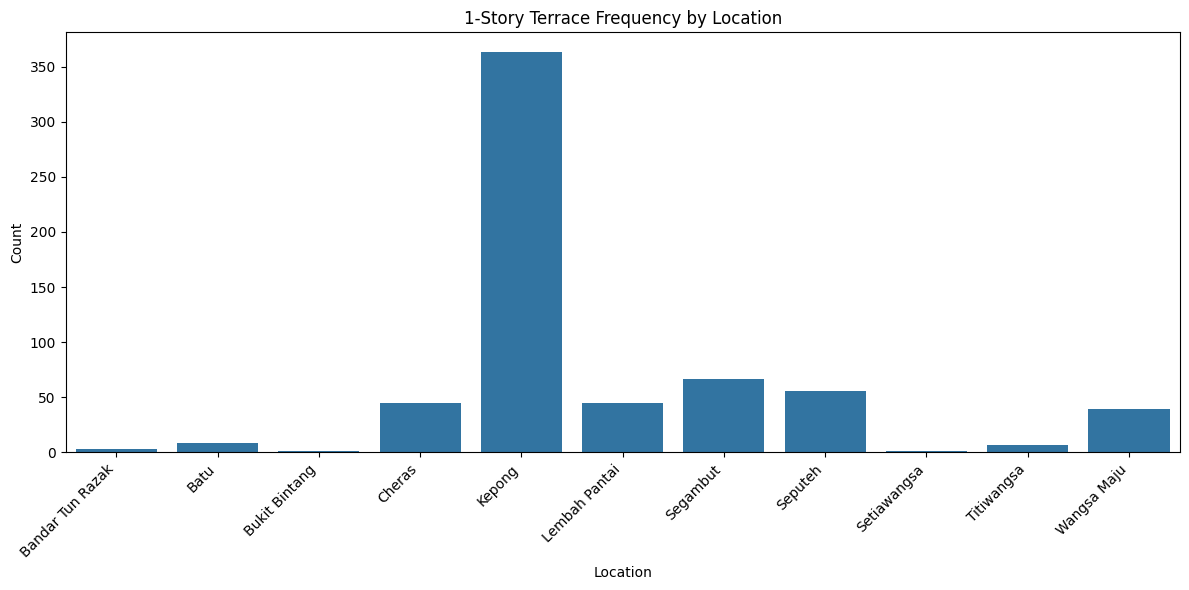

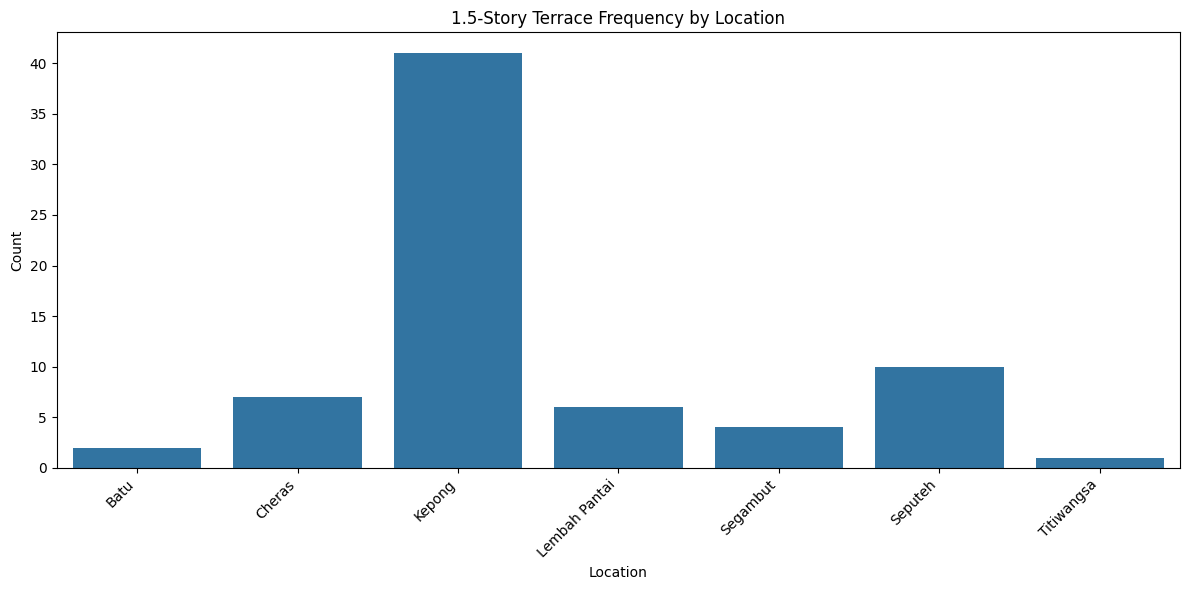

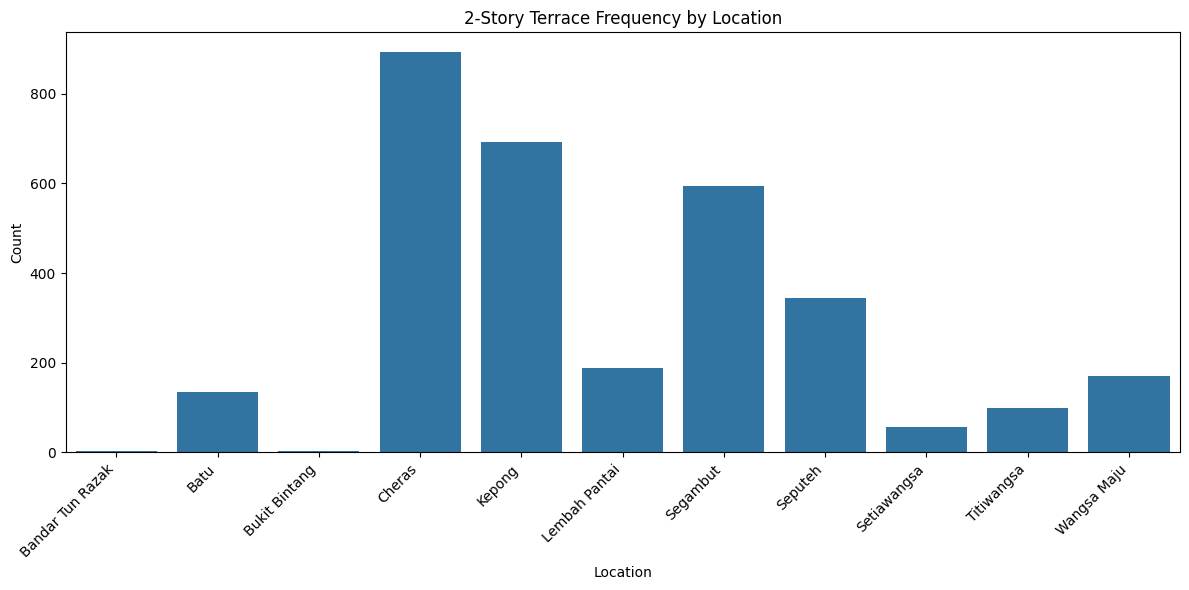

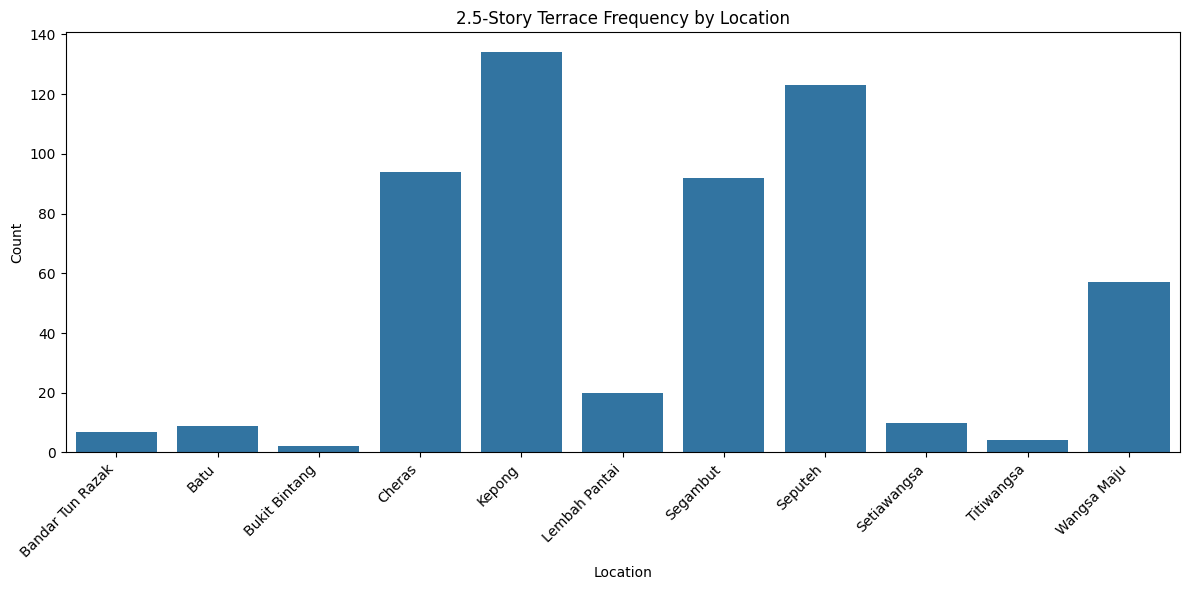

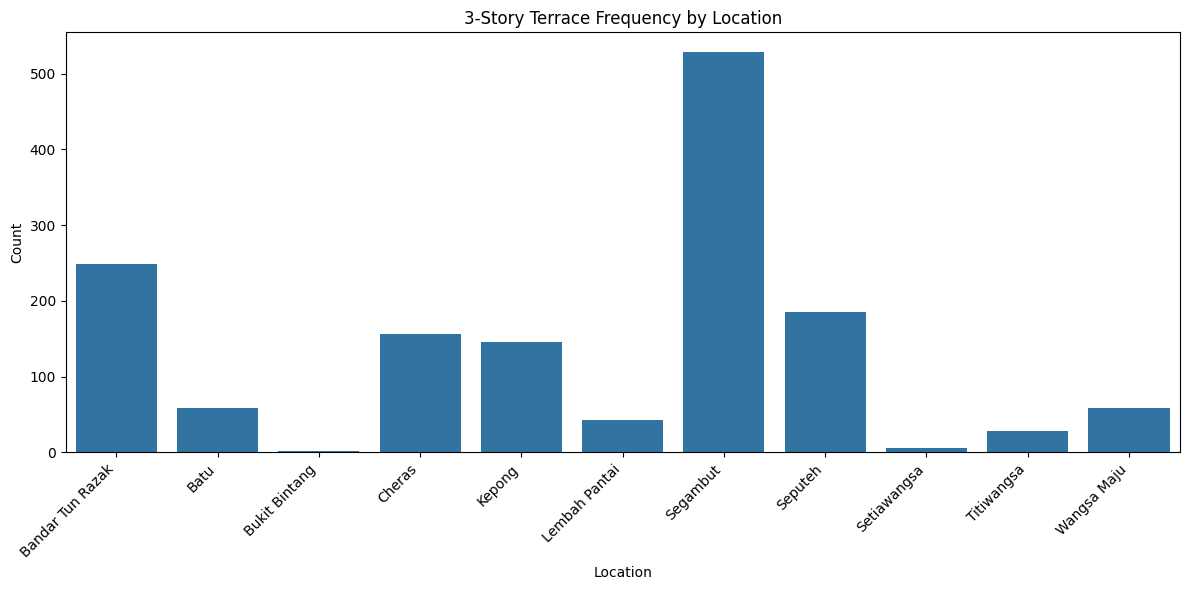

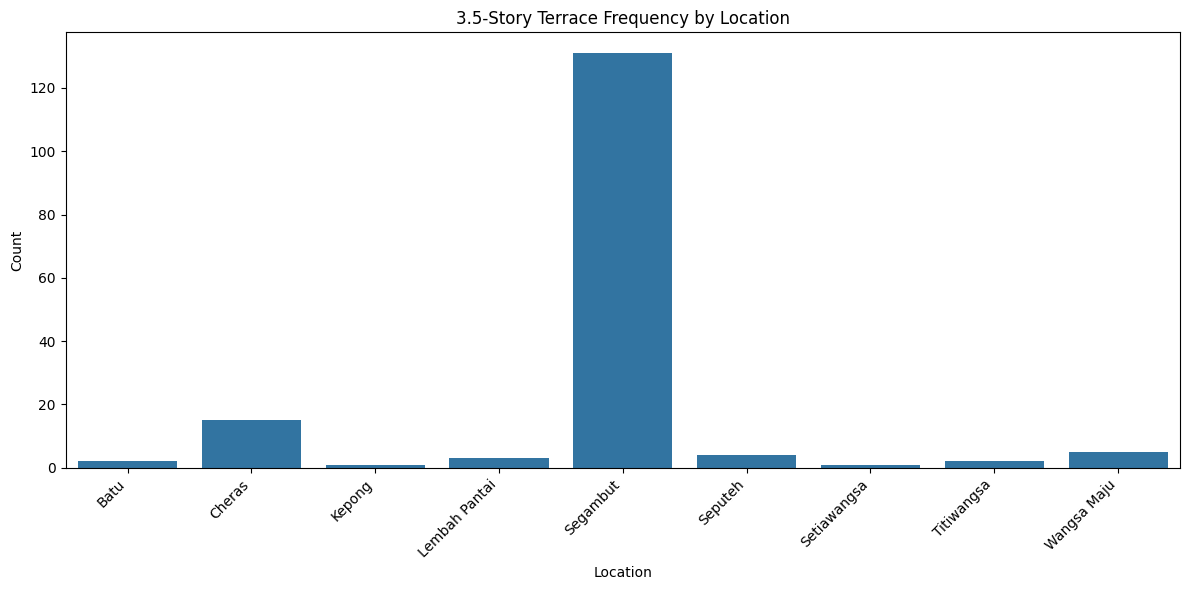

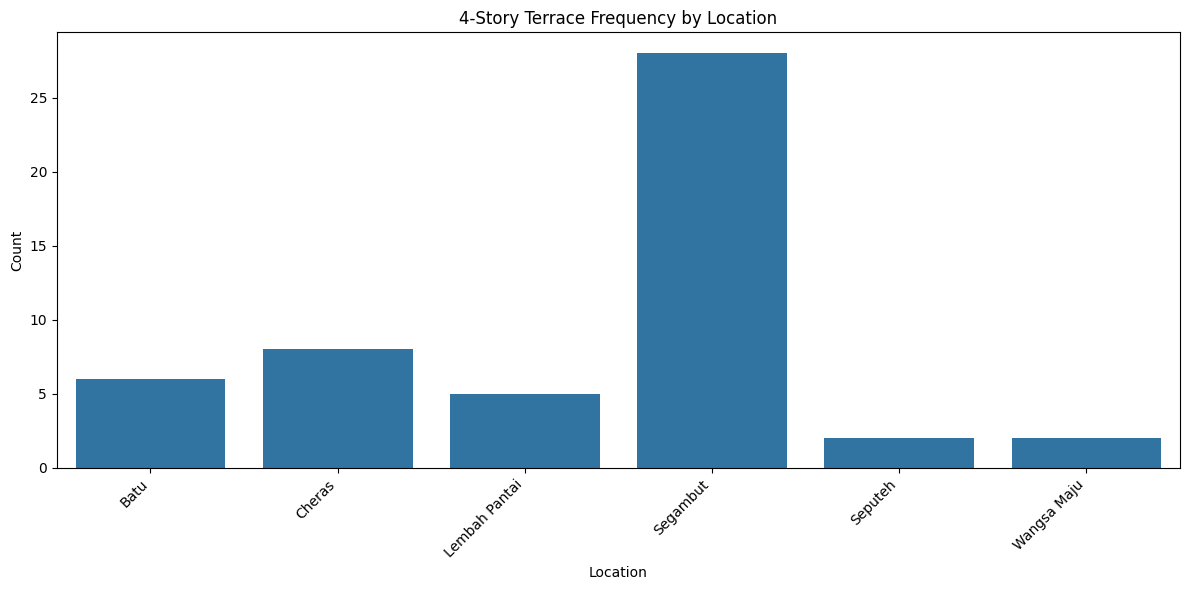

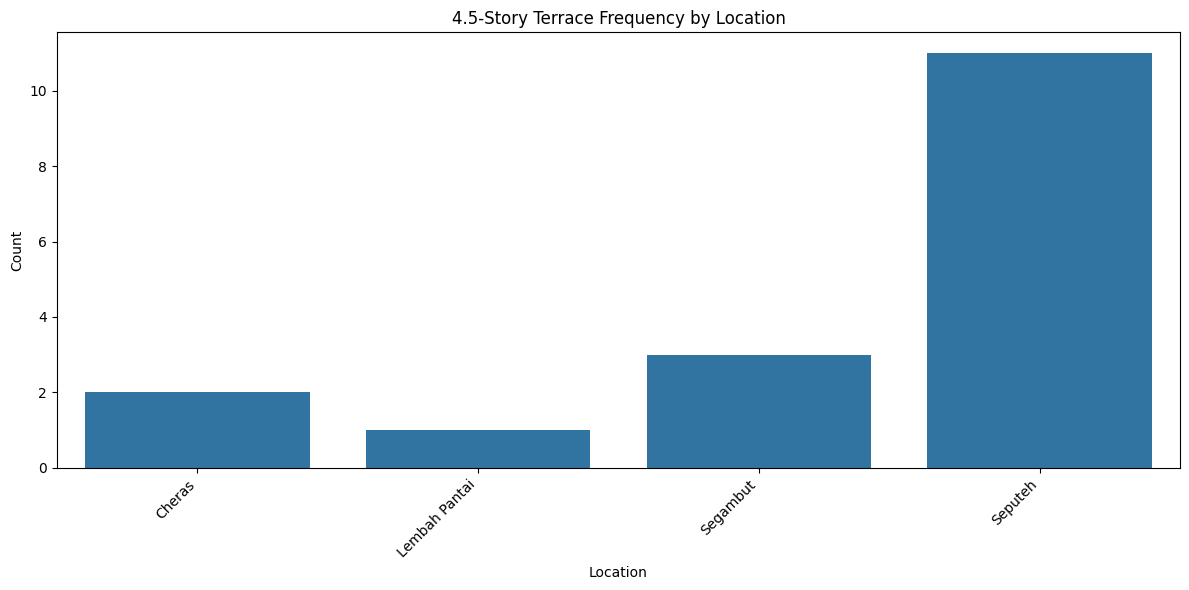

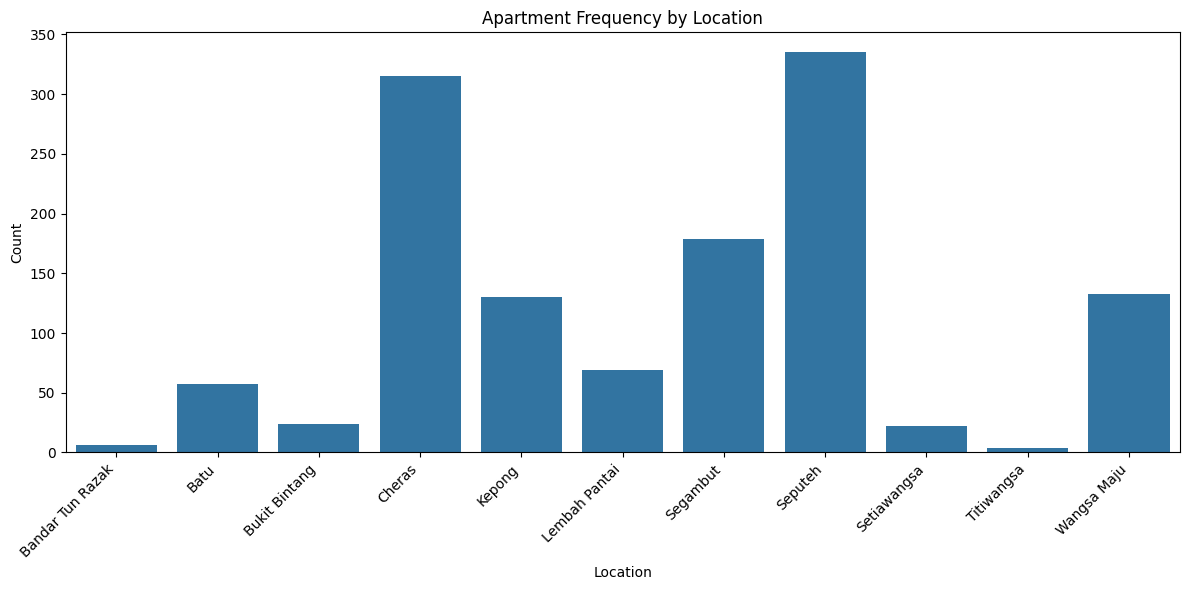

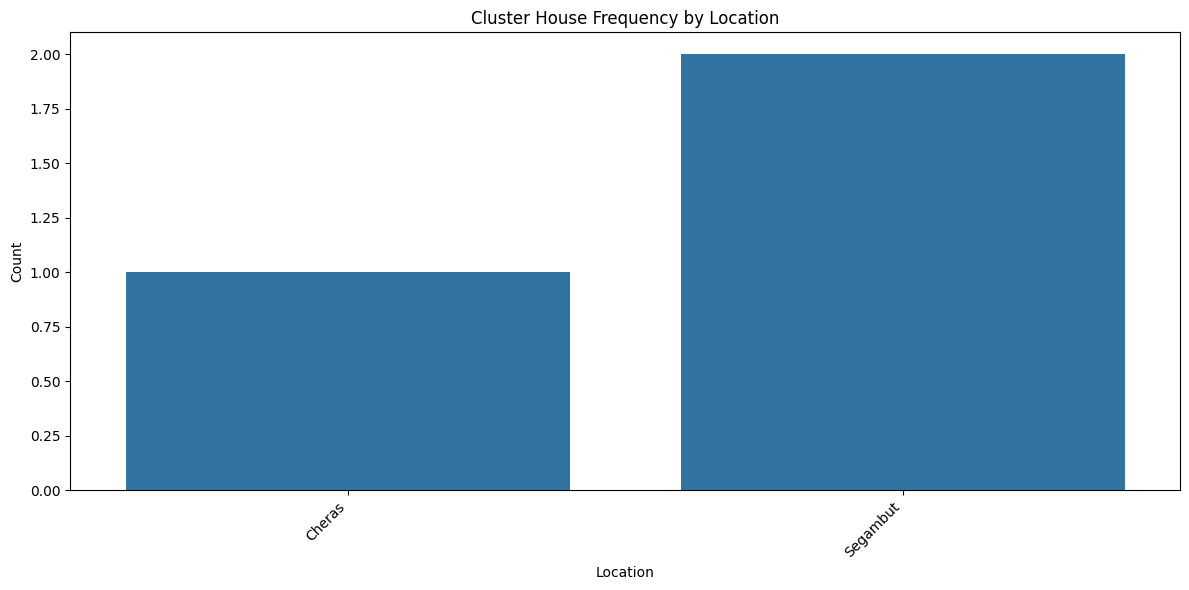

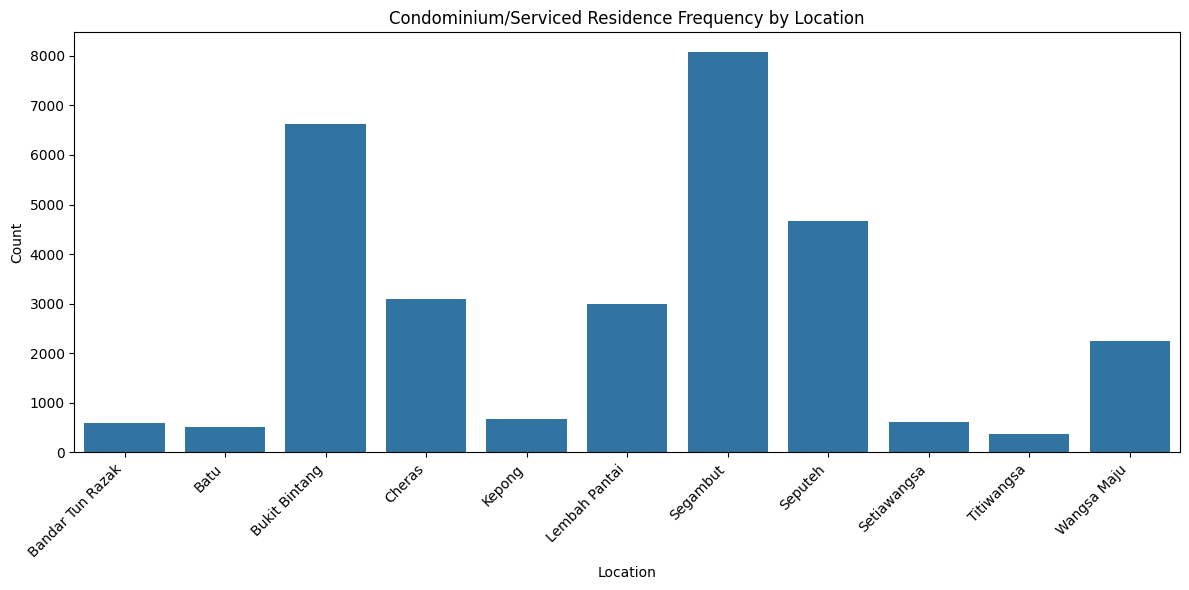

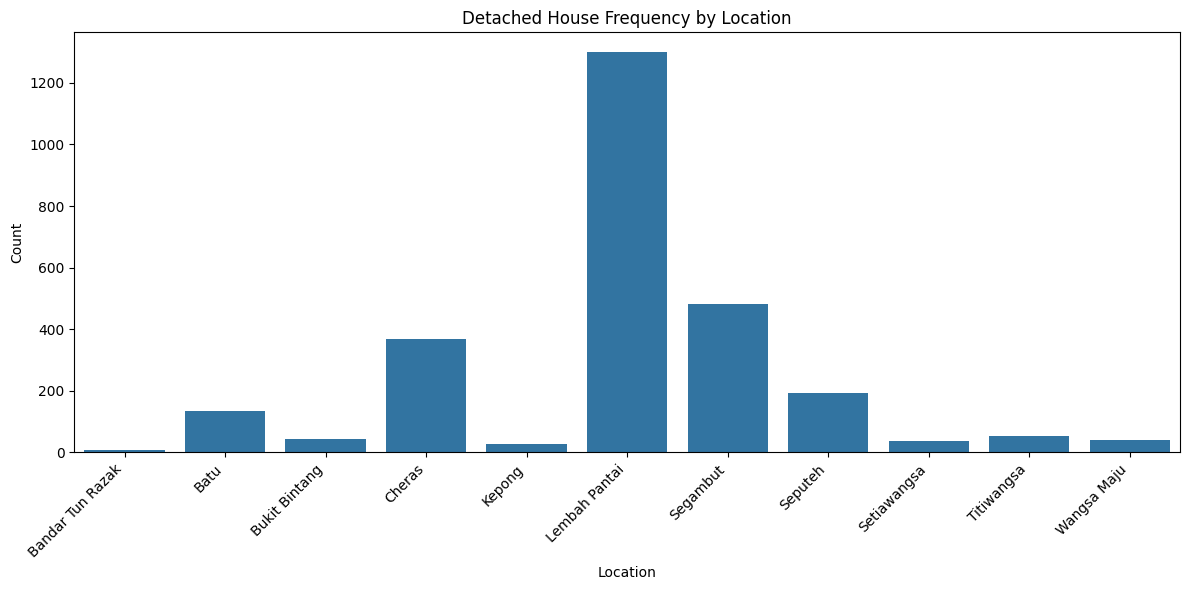

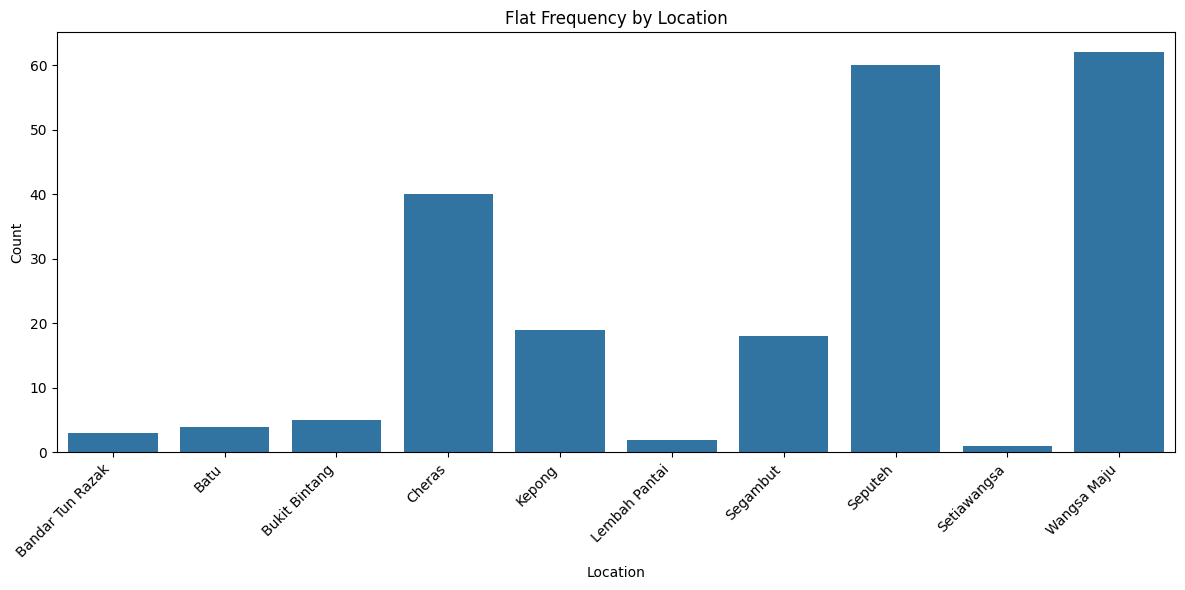

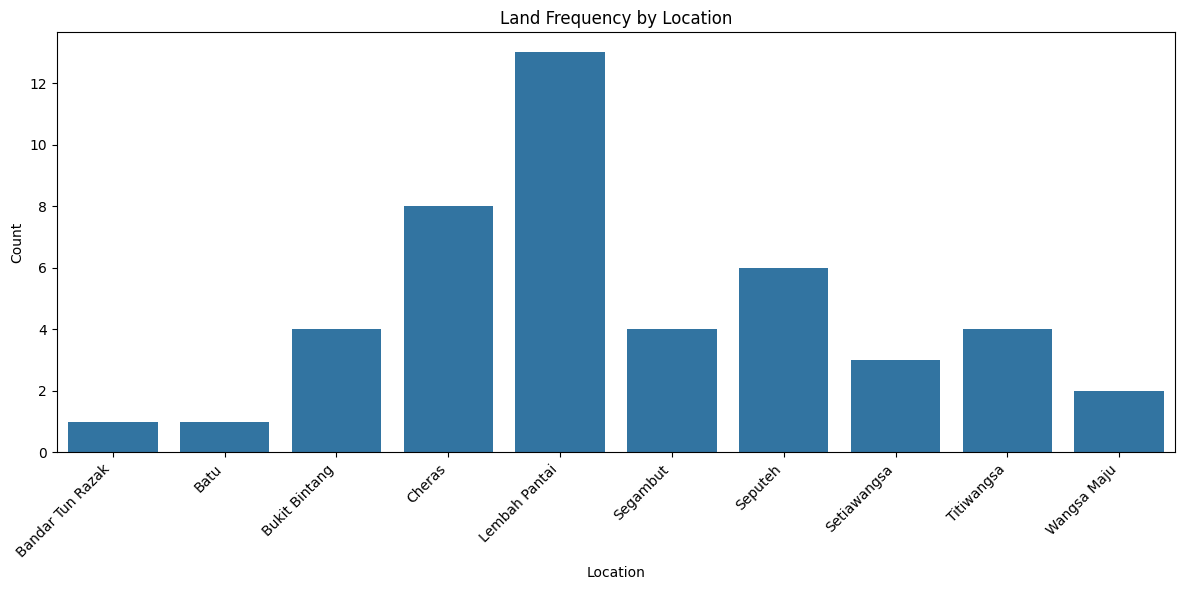

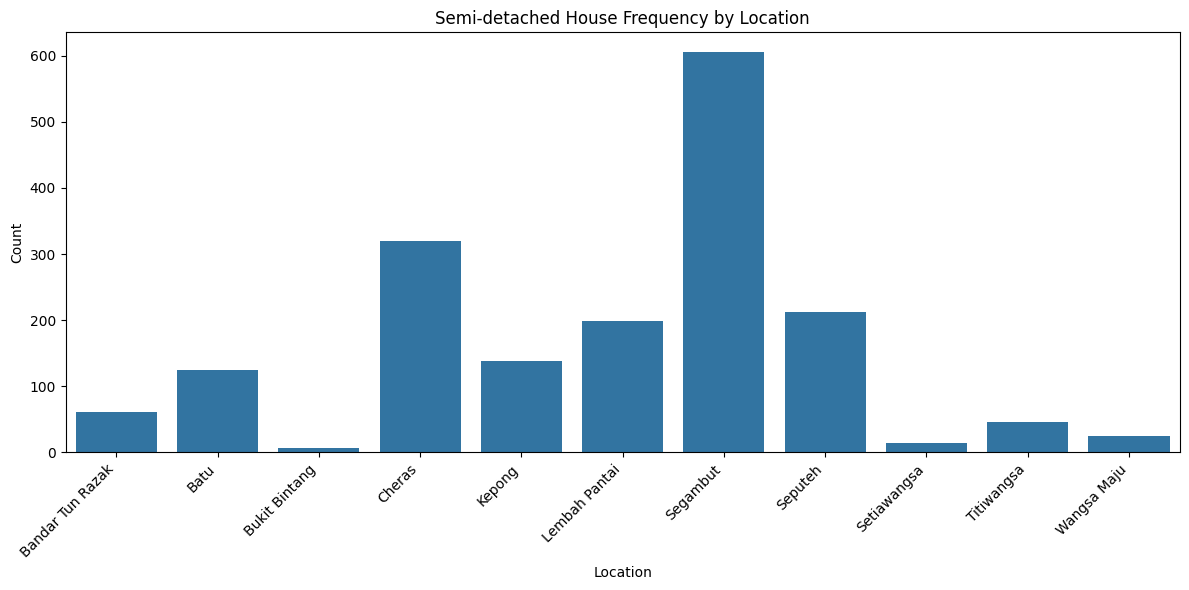

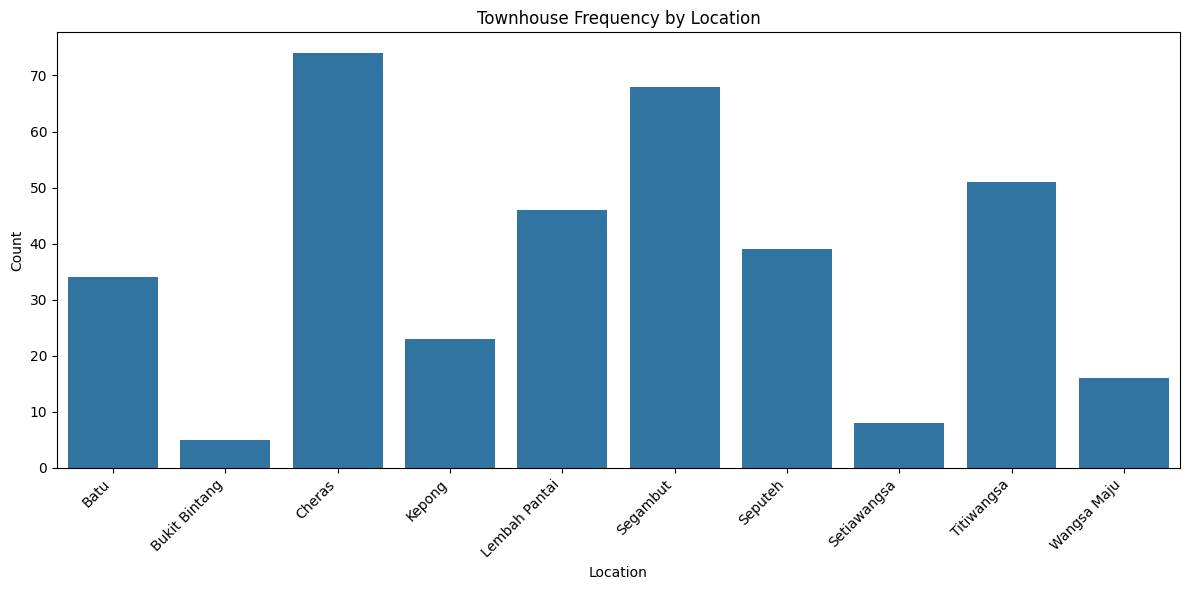

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
property_location_counts = df.groupby(['Property Type', 'Location'])['Location'].count().reset_index(name='Count')

# Create a bar chart for each property type
for property_type in property_location_counts['Property Type'].unique():
    property_data = property_location_counts[property_location_counts['Property Type'] == property_type]

    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    sns.barplot(x='Location', y='Count', data=property_data)
    plt.title(f'{property_type} Frequency by Location')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

#####Combine 1 and 1.5 story into 1-1.5 story
#####Combine 2 and 2.5 story into 2-2.5 story
#####Combine 3, 3.5, 4, 4.5 story into 3+ stories
#####Remove the cluster house
#####

##Data Transformation - 2

#####Split the size to size(sqft) and size category

In [ ]:
import pandas as pd
import re

def split_size(size_str):
    if pd.isna(size_str):
        return pd.Series({'size_type': None, 'size_value': None})

    # Check if it's built-up or land area
    if 'Built-up' in str(size_str):
        size_type = 'Built-Up'
    elif 'Land area' in str(size_str):
        size_type = 'Land Area'
    else:
        size_type = 'Unknown'

    # Extract numeric value
    match = re.search(r':\s*([\d,]+)', str(size_str))
    if match:
        size_value = match.group(1).replace(',', '')
        return pd.Series({'size_type': size_type, 'size_value': float(size_value)})

    return pd.Series({'size_type': size_type, 'size_value': None})

# Apply the splitting function to df
df[['Size Category', 'Size(sq.ft.)']] = df['Size'].apply(split_size)

# Display the first few rows of df to verify
print(df[['Location', 'Size', 'Size Category', 'Size(sq.ft.)']].head())

        Location                      Size Size Category  Size(sq.ft.)
0  Bukit Bintang  Built-up : 1,335 sq. ft.      Built-Up        1335.0
1  Lembah Pantai  Land area : 6900 sq. ft.     Land Area        6900.0
2       Segambut  Built-up : 1,875 sq. ft.      Built-Up        1875.0
4        Seputeh  Built-up : 1,513 sq. ft.      Built-Up        1513.0
5       Segambut  Land area : 7200 sq. ft.     Land Area        7200.0


In [ ]:
df = df.drop('Size', axis=1)  # To remove the 'Size' column from the DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42934 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       42934 non-null  object 
 1   Price          42934 non-null  float64
 2   Rooms          42934 non-null  Int64  
 3   Bathrooms      42934 non-null  Int64  
 4   Property Type  42934 non-null  object 
 5   Furnishing     42934 non-null  object 
 6   Size Category  42934 non-null  object 
 7   Size(sq.ft.)   42891 non-null  float64
dtypes: Int64(2), float64(2), object(4)
memory usage: 3.0+ MB


#####Remove the outliers for the size(sqft) for each property types

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
property_types = df['Property Type'].unique()

for property_type in property_types:
    data = df[df['Property Type'] == property_type]  # Filter data for the current property type

    if len(data) > 0:
        Q1 = data['Size(sq.ft.)'].quantile(0.25)
        Q3 = data['Size(sq.ft.)'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        outliers_removed_data = data[(data['Size(sq.ft.)'] >= lower_bound) & (data['Size(sq.ft.)'] <= upper_bound)]

        # Update the original DataFrame
        df = pd.concat([df[~df.index.isin(data.index)], outliers_removed_data])
        #This involves first dropping the rows corresponding to the `data` slice from the original dataframe and then adding back the filtered data for that slice.

print(f"Shape of DataFrame after removing outliers: {df.shape}")

Shape of DataFrame after removing outliers: (39574, 8)


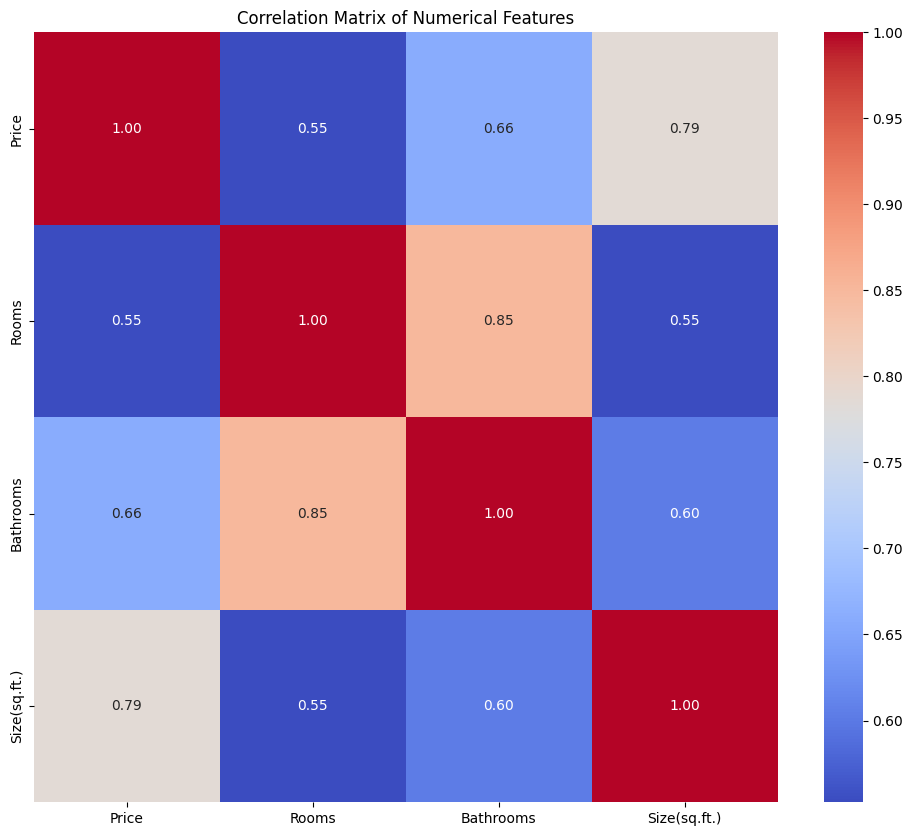

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#####Since now land some areas has lost data, so we use combine it with detached house instead.

In [ ]:
df['Property Type'] = df['Property Type'].replace({'Land': 'Detached House'})

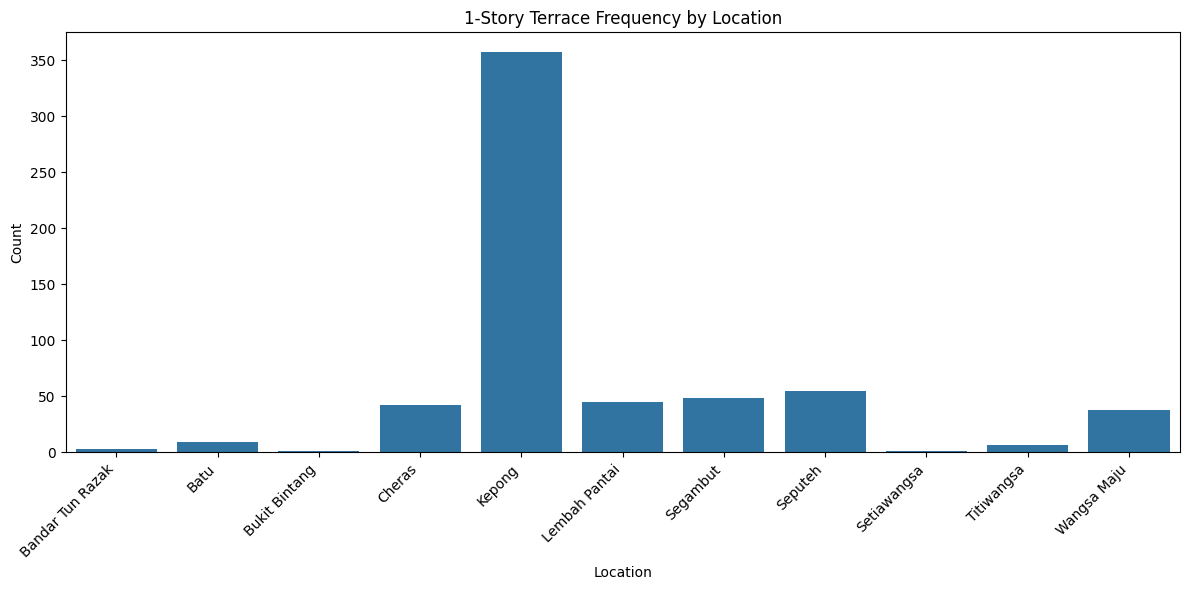

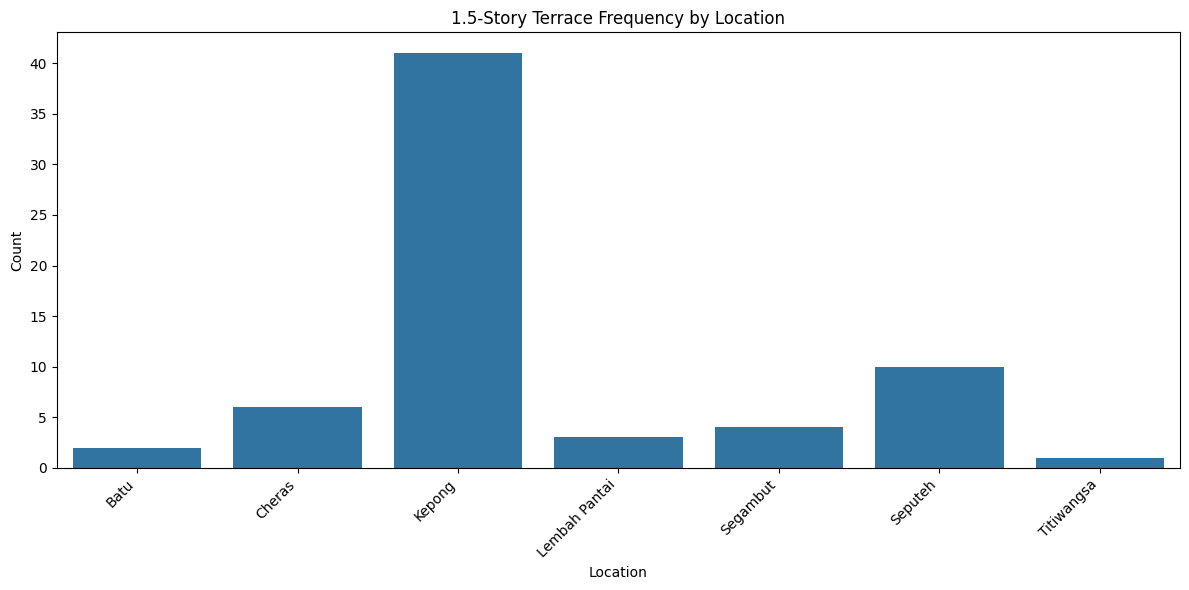

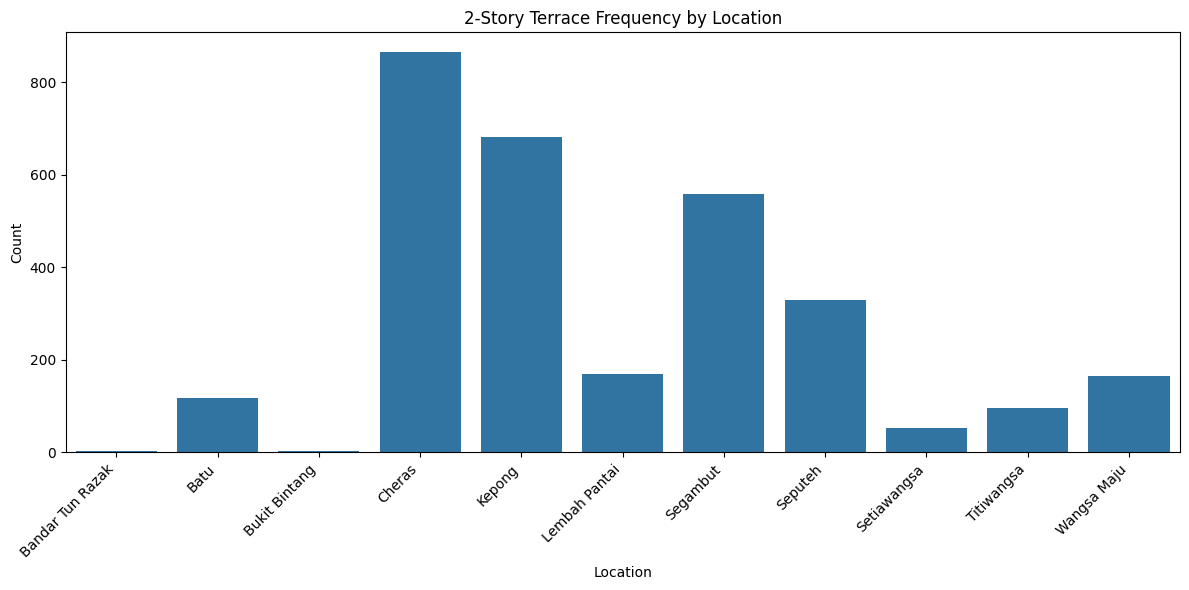

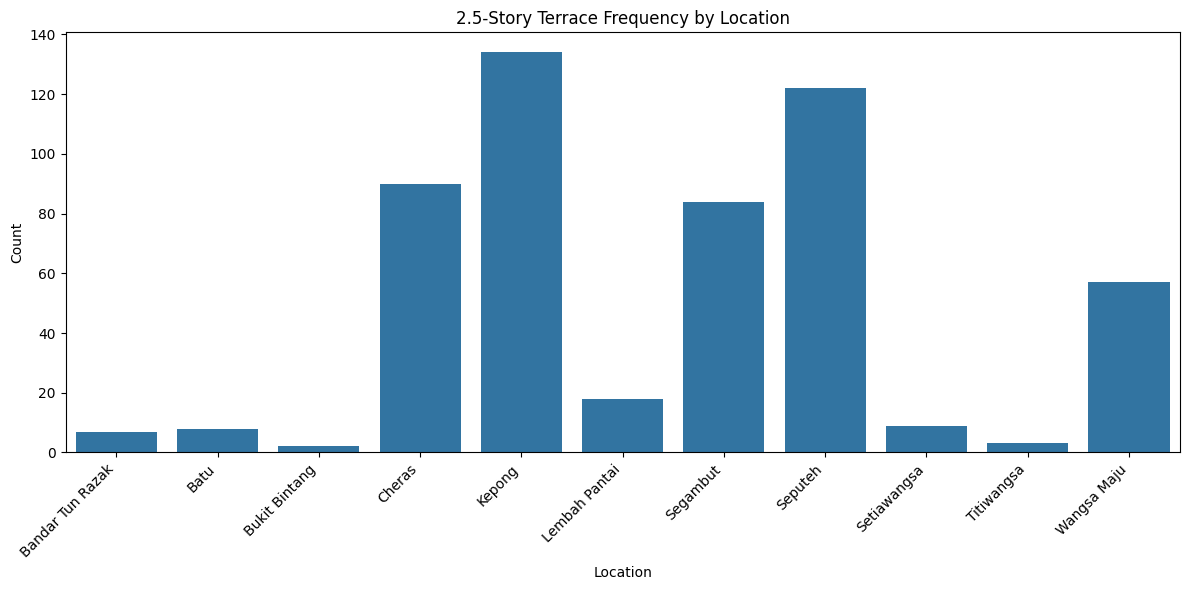

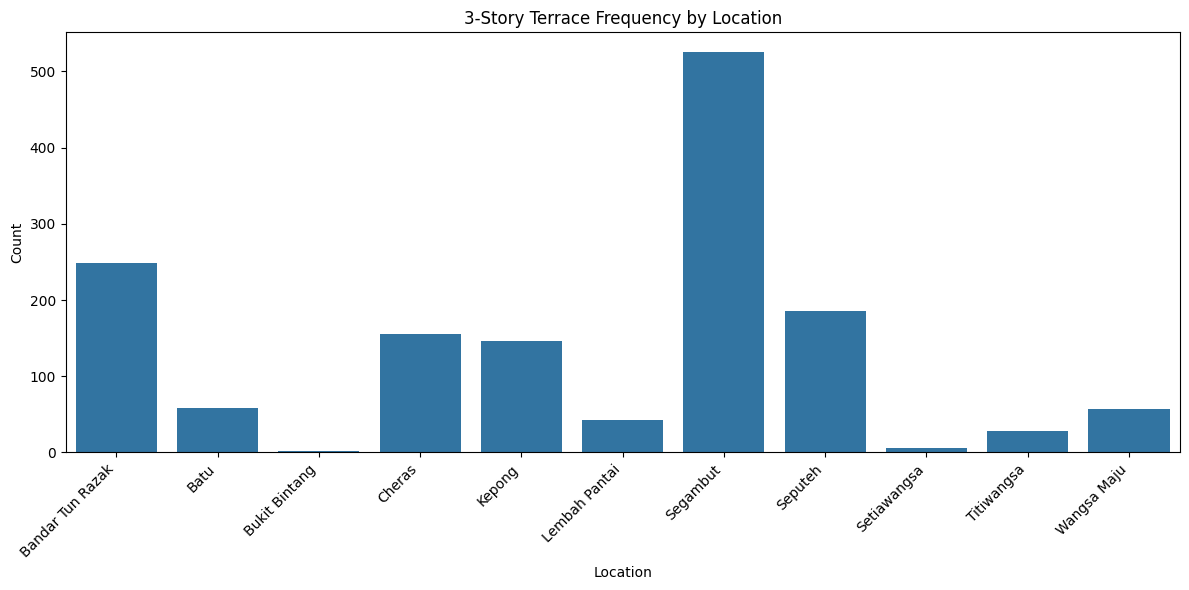

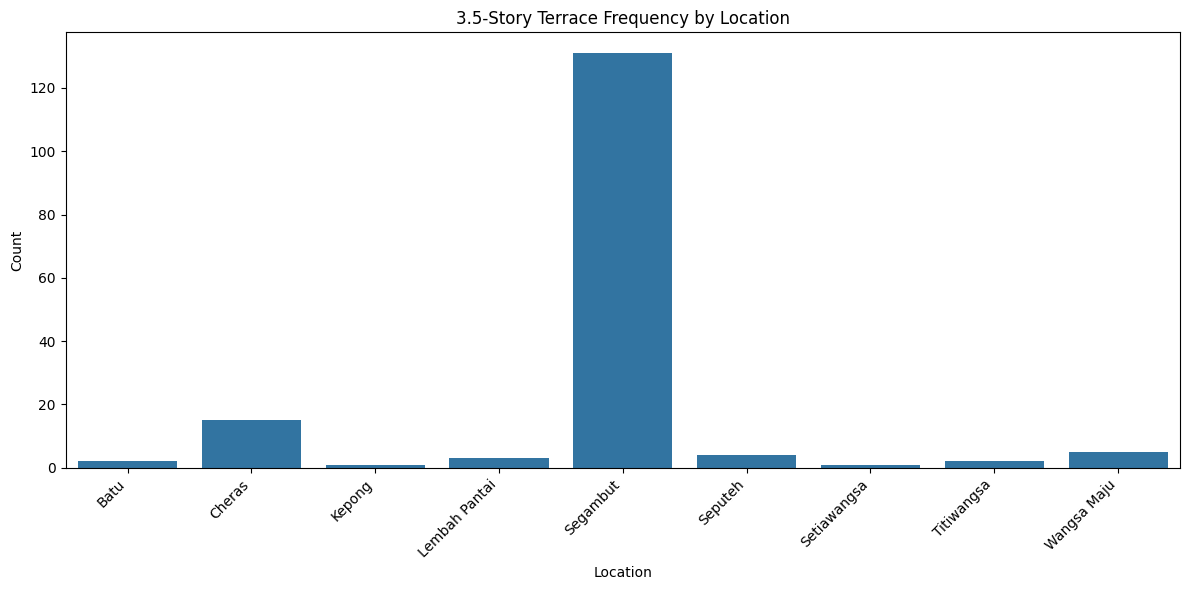

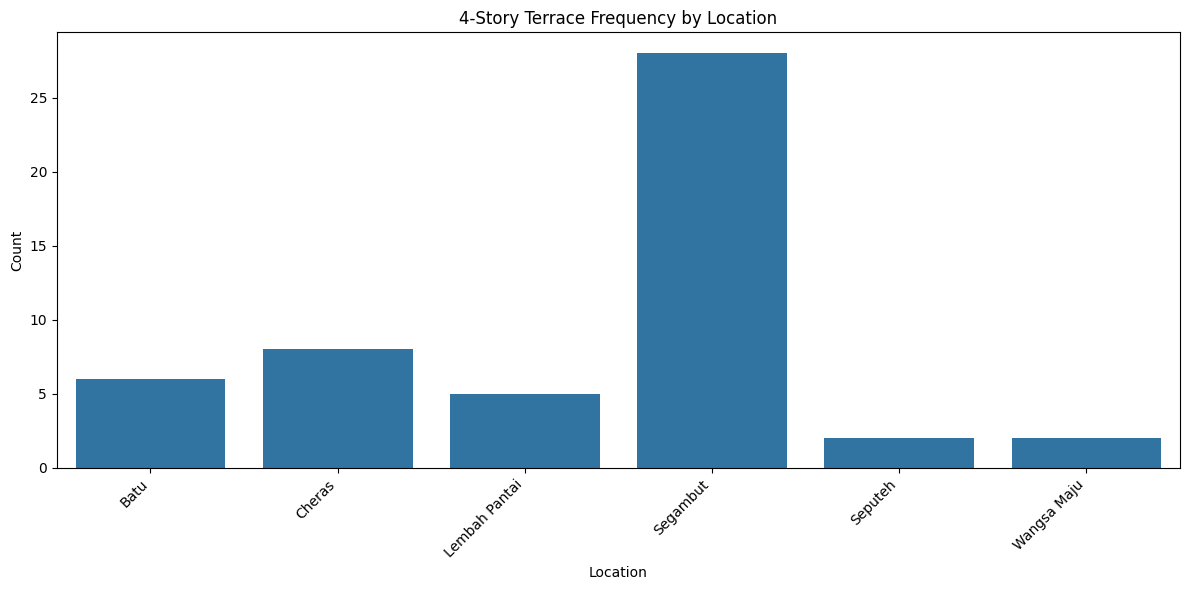

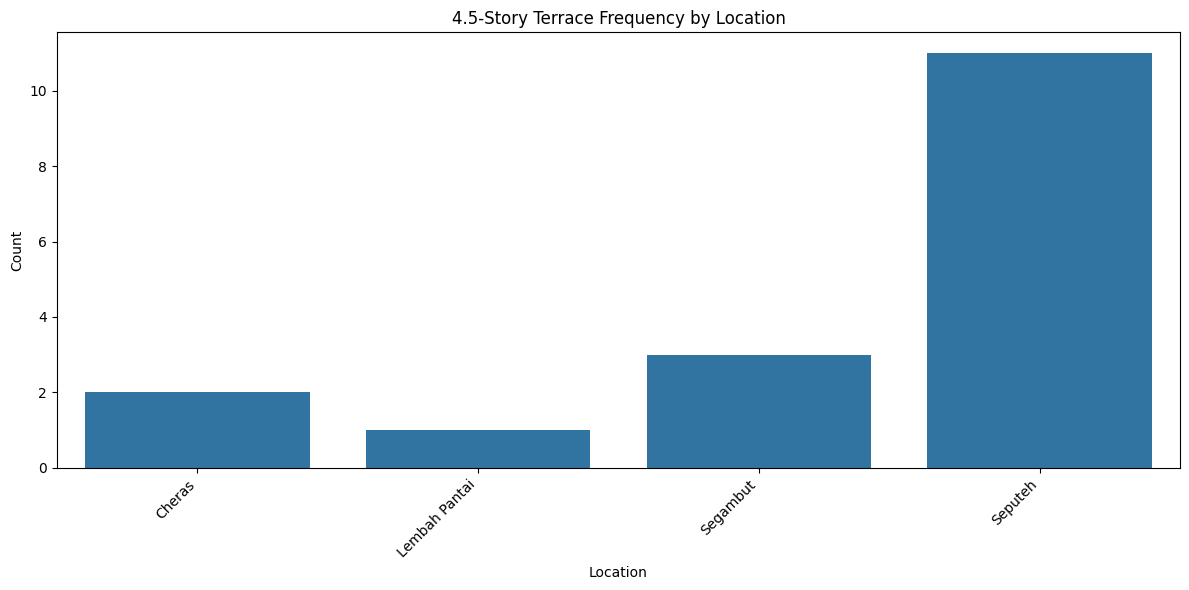

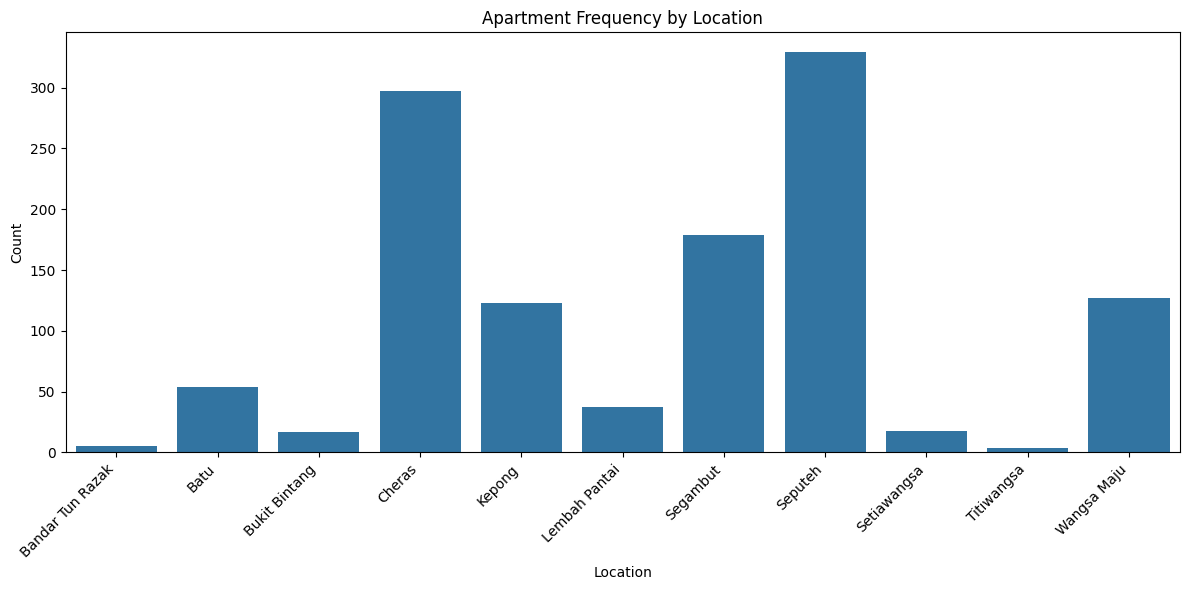

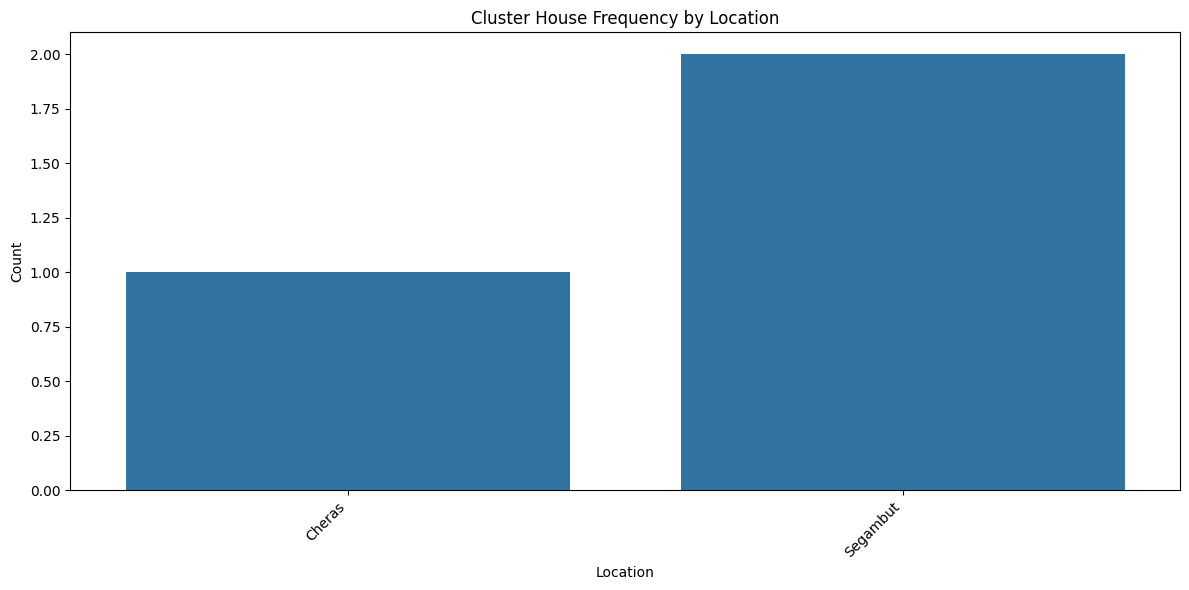

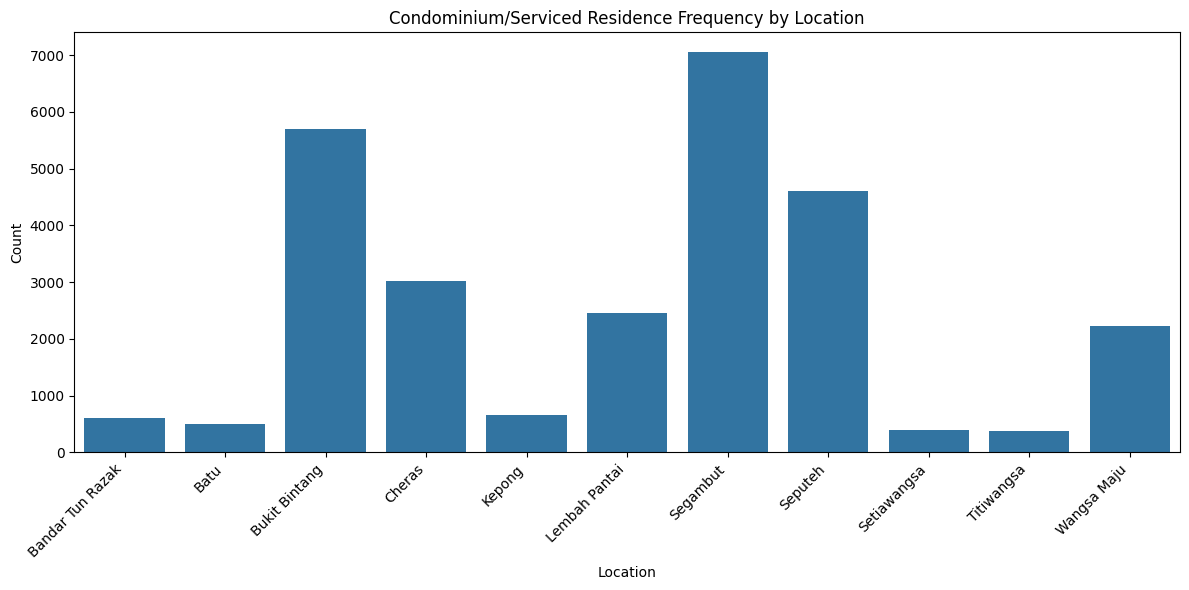

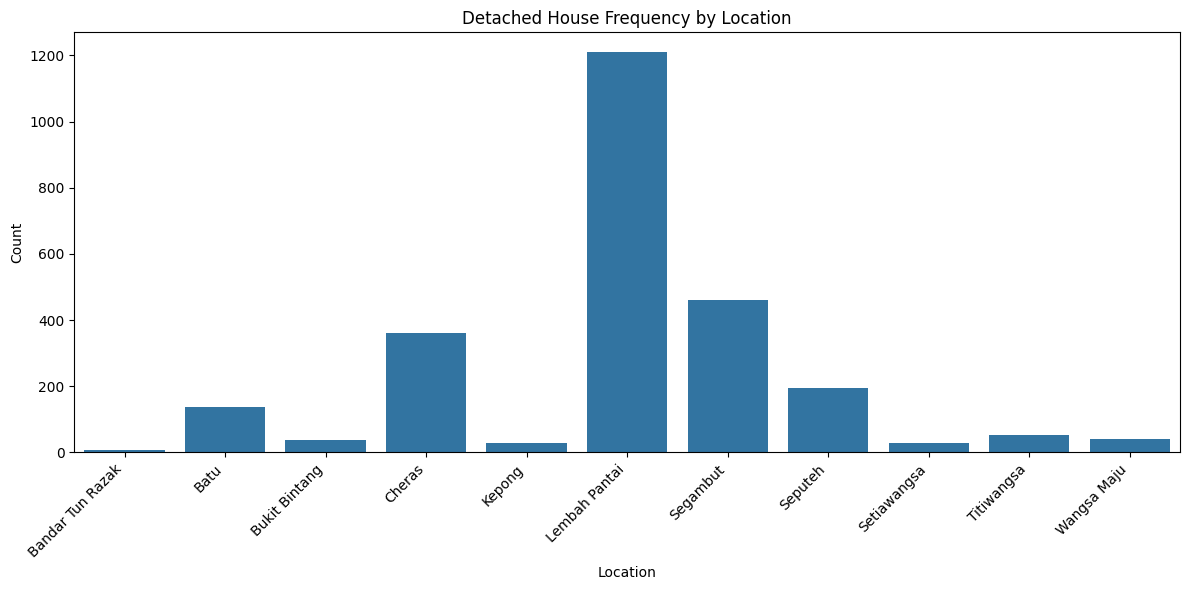

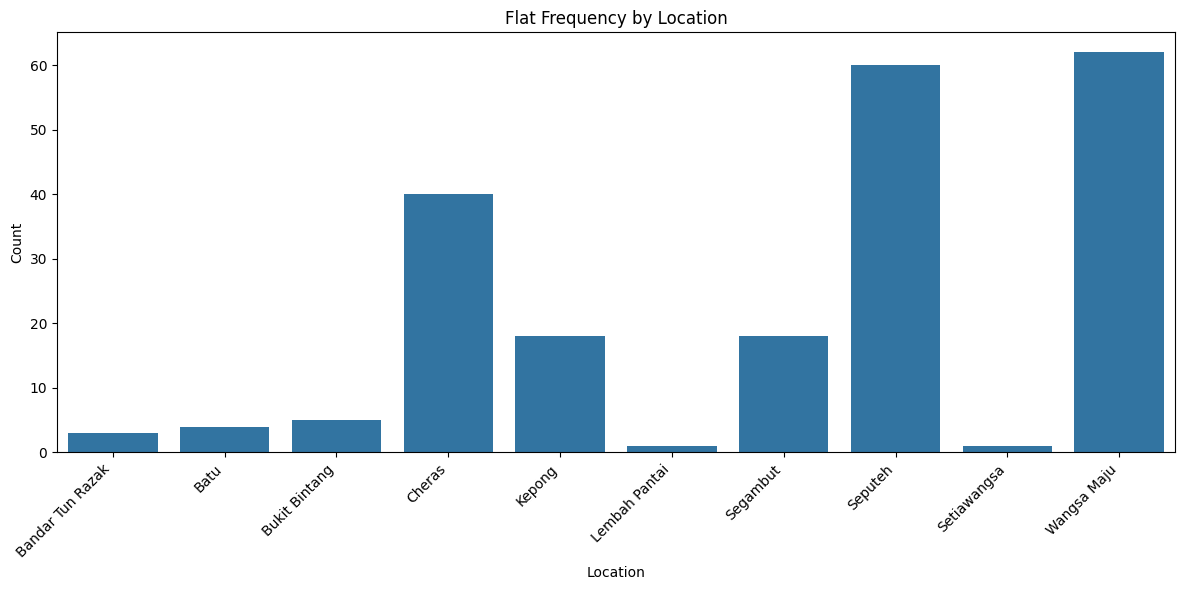

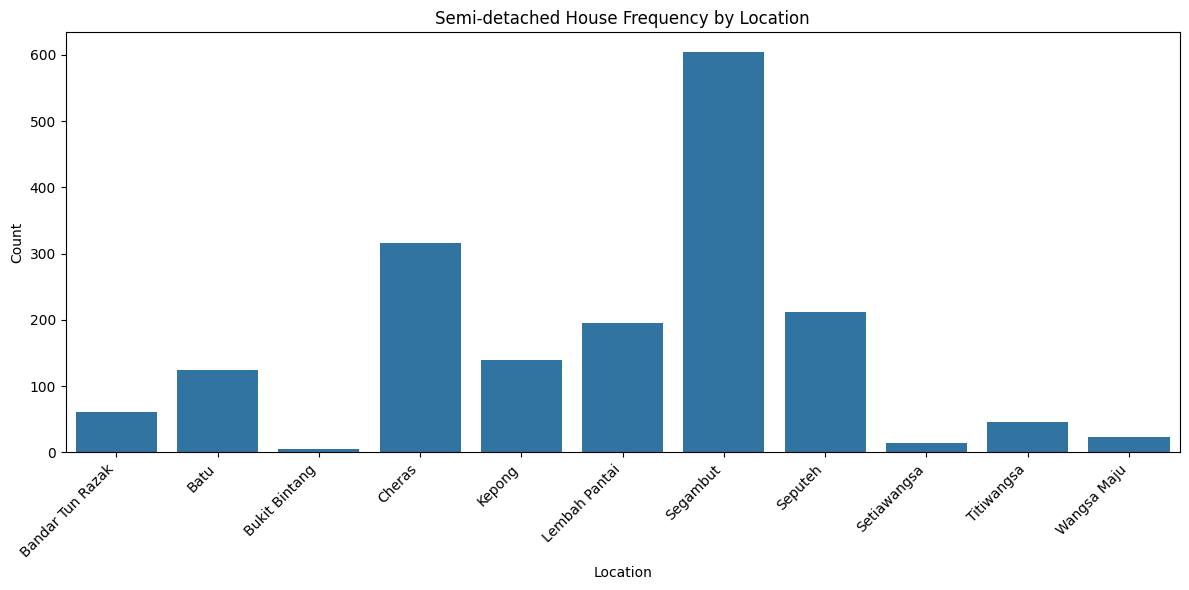

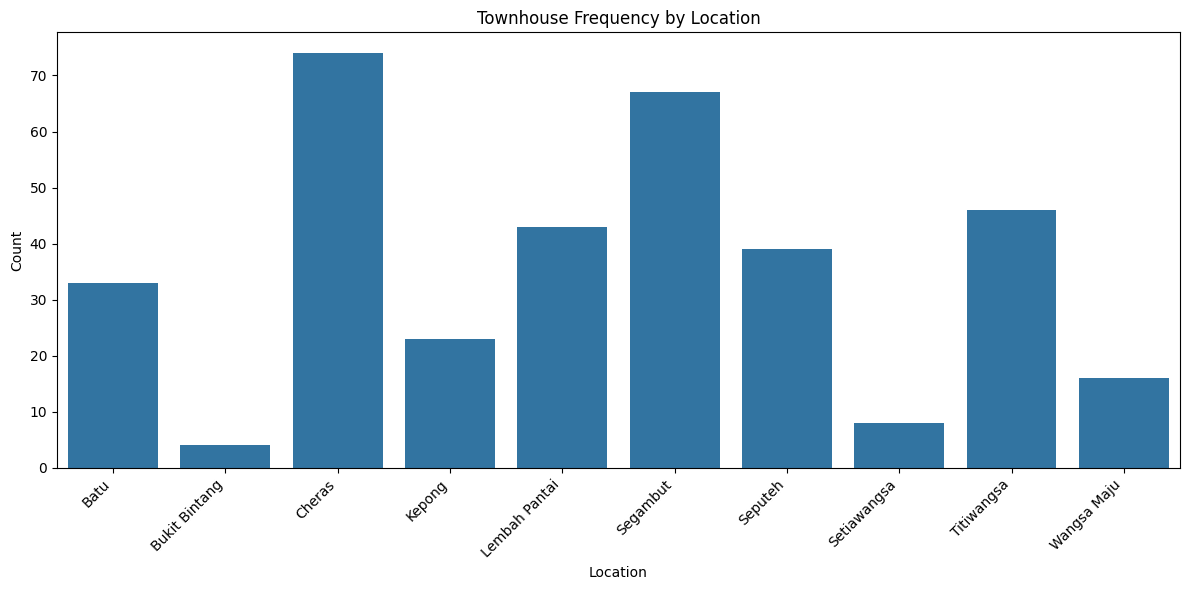

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
property_location_counts = df.groupby(['Property Type', 'Location'])['Location'].count().reset_index(name='Count')

# Create a bar chart for each property type
for property_type in property_location_counts['Property Type'].unique():
    property_data = property_location_counts[property_location_counts['Property Type'] == property_type]

    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    sns.barplot(x='Location', y='Count', data=property_data)
    plt.title(f'{property_type} Frequency by Location')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

#####Add the new column, Total Rooms and the new column(Price per sqft)


In [ ]:
# Add 'Total Rooms' column (assuming it's the sum of Rooms and Bathrooms)
df['Total Rooms'] = df['Rooms'] + df['Bathrooms']

# Add 'Price per sqft' column
df['Price per sqft'] = df['Price'] / df['Size(sq.ft.)']

# Display the updated DataFrame
print(df.head())

         Location      Price  Rooms  Bathrooms  \
0   Bukit Bintang  1250000.0      3          3   
2        Segambut  1030000.0      3          4   
4         Seputeh   900000.0      5          3   
18       Segambut  1780000.0      5          4   
20       Segambut  1500000.0      5          4   

                     Property Type        Furnishing Size Category  \
0   Condominium/Serviced Residence   Fully Furnished      Built-Up   
2   Condominium/Serviced Residence  Partly Furnished      Built-Up   
4   Condominium/Serviced Residence  Partly Furnished      Built-Up   
18  Condominium/Serviced Residence  Partly Furnished      Built-Up   
20  Condominium/Serviced Residence  Partly Furnished      Built-Up   

    Size(sq.ft.)  Total Rooms  Price per sqft  
0         1335.0            6      936.329588  
2         1875.0            7      549.333333  
4         1513.0            8      594.844679  
18        1830.0            9      972.677596  
20        1798.0            9      834

##Data Reduction - 2

#####•We will like to explore the correlation between each numerical features to find out if they are affected by outliers.

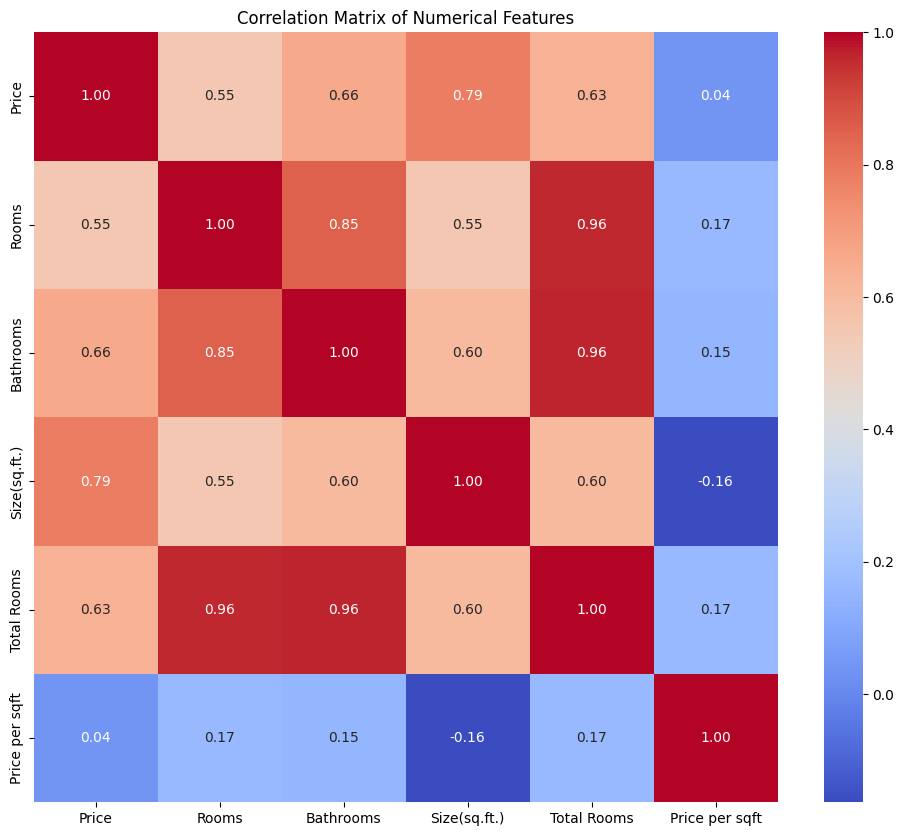

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#####•Here, we realised rooms and bathrooms are very high related to each other, we might just remove them

In [ ]:
df = df.drop(['Bathrooms', 'Rooms'], axis=1)
df.head()

,Location,Price,Property Type,Furnishing,Size Category,Size(sq.ft.),Total Rooms,Price per sqft
0,Bukit Bintang,1250000.0,Condominium/Serviced Residence,Fully Furnished,Built-Up,1335.0,6,936.329588
2,Segambut,1030000.0,Condominium/Serviced Residence,Partly Furnished,Built-Up,1875.0,7,549.333333
4,Seputeh,900000.0,Condominium/Serviced Residence,Partly Furnished,Built-Up,1513.0,8,594.844679
18,Segambut,1780000.0,Condominium/Serviced Residence,Partly Furnished,Built-Up,1830.0,9,972.677596
20,Segambut,1500000.0,Condominium/Serviced Residence,Partly Furnished,Built-Up,1798.0,9,834.260289


#####•Here we remove all outliers that is from the price per sqft for each property type, for each location

In [ ]:
import pandas as pd

def remove_outliers_by_group(df, group_cols, target_col):
    """
    Removes outliers from a DataFrame based on the IQR method, grouped by specified columns.

    Args:
        df: The input DataFrame.
        group_cols: A list of columns to group by.
        target_col: The column containing the values to check for outliers.

    Returns:
        A new DataFrame with outliers removed.
    """

    # Create a copy of the DataFrame to avoid modifying the original
    cleaned_df = df.copy()

    for _, group in df.groupby(group_cols):
        Q1 = group[target_col].quantile(0.25)
        Q3 = group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers for the current group
        # Use boolean indexing to select rows within the bounds
        is_outlier = ~((group[target_col] >= lower_bound) & (group[target_col] <= upper_bound))

        # Remove outliers from the cleaned DataFrame
        cleaned_df = cleaned_df.drop(group[is_outlier].index)

    return cleaned_df

# Assuming your DataFrame is named 'df' and has 'Location', 'Property Type', and 'Price per sqft' columns
df = remove_outliers_by_group(df, ['Location', 'Property Type'], 'Price per sqft')

# Display the cleaned DataFrame (optional)
print(df)

            Location      Price                   Property Type  \
0      Bukit Bintang  1250000.0  Condominium/Serviced Residence   
2           Segambut  1030000.0  Condominium/Serviced Residence   
4            Seputeh   900000.0  Condominium/Serviced Residence   
18          Segambut  1780000.0  Condominium/Serviced Residence   
20          Segambut  1500000.0  Condominium/Serviced Residence   
...              ...        ...                             ...   
49897  Bukit Bintang  7990000.0                  Detached House   
50356         Cheras  3000000.0                  Detached House   
12534         Cheras  2700000.0                   Cluster House   
16095       Segambut  3800000.0                   Cluster House   
25064       Segambut  3600000.0                   Cluster House   

             Furnishing Size Category  Size(sq.ft.)  Total Rooms  \
0       Fully Furnished      Built-Up        1335.0            6   
2      Partly Furnished      Built-Up        1875.0        

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38385 entries, 0 to 25064
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        38385 non-null  object 
 1   Price           38385 non-null  float64
 2   Property Type   38385 non-null  object 
 3   Furnishing      38385 non-null  object 
 4   Size Category   38385 non-null  object 
 5   Size(sq.ft.)    38385 non-null  float64
 6   Total Rooms     38385 non-null  Int64  
 7   Price per sqft  38385 non-null  float64
dtypes: Int64(1), float64(3), object(4)
memory usage: 2.7+ MB


#####•Here we remove the outliers of price for each location for each property types as well.

In [ ]:
import pandas as pd

def remove_outliers_by_group(df, group_cols, target_cols):
    """
    Removes outliers from a DataFrame based on the IQR method, grouped by specified columns,
    for multiple target columns.

    Args:
        df: The input DataFrame.
        group_cols: A list of columns to group by.
        target_cols: A list of columns containing the values to check for outliers.

    Returns:
        A new DataFrame with outliers removed.
    """

    cleaned_df = df.copy()  # Create a copy to avoid modifying the original DataFrame

    # Create a boolean mask to track outliers, initialized to all False
    all_outliers = pd.Series(False, index=cleaned_df.index)

    for _, group in df.groupby(group_cols):
        for target_col in target_cols:  # Iterate through target columns
            Q1 = group[target_col].quantile(0.25)
            Q3 = group[target_col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter out outliers for the current group and target column
            is_outlier = ~((group[target_col] >= lower_bound) & (group[target_col] <= upper_bound))

            # Update the all_outliers mask
            all_outliers[group[is_outlier].index] = True

    # Remove outliers from the cleaned DataFrame all at once
    cleaned_df = cleaned_df[~all_outliers]

    return cleaned_df

# Assuming your DataFrame is named 'df' and has 'Location', 'Property Type', 'Price', and 'Price per sqft' columns
df = remove_outliers_by_group(df, ['Location', 'Property Type'], ['Price', 'Price per sqft'])

# Display the cleaned DataFrame (optional)
print(df)

            Location      Price                   Property Type  \
0      Bukit Bintang  1250000.0  Condominium/Serviced Residence   
2           Segambut  1030000.0  Condominium/Serviced Residence   
4            Seputeh   900000.0  Condominium/Serviced Residence   
18          Segambut  1780000.0  Condominium/Serviced Residence   
20          Segambut  1500000.0  Condominium/Serviced Residence   
...              ...        ...                             ...   
49897  Bukit Bintang  7990000.0                  Detached House   
50356         Cheras  3000000.0                  Detached House   
12534         Cheras  2700000.0                   Cluster House   
16095       Segambut  3800000.0                   Cluster House   
25064       Segambut  3600000.0                   Cluster House   

             Furnishing Size Category  Size(sq.ft.)  Total Rooms  \
0       Fully Furnished      Built-Up        1335.0            6   
2      Partly Furnished      Built-Up        1875.0        

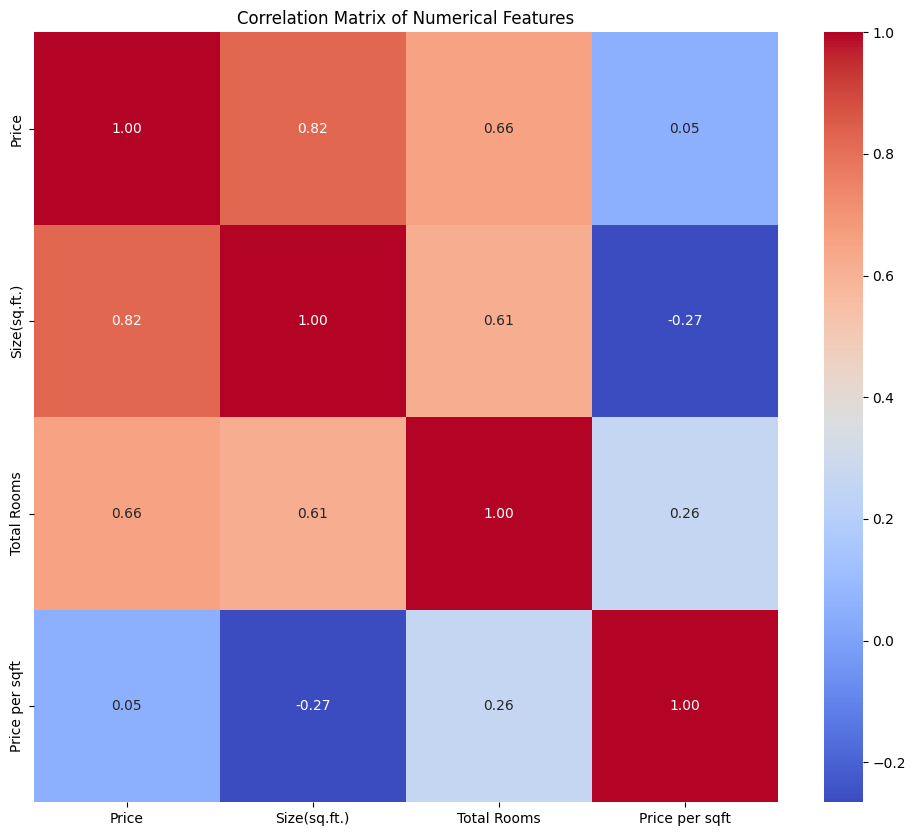

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#####•Typically, for each location and property type, an increase in the total number of rooms corresponds to a rise in price. As such, we will revisit this analysis and eliminate any outliers accordingly.

In [ ]:
import pandas as pd

def remove_outliers_by_group_relationship(df, group_cols, target_col, value_col):
    """
    Removes outliers from a DataFrame based on the IQR method, grouped by specified columns,
    considering the relationship between a target column and a value column.

    Args:
        df: The input DataFrame.
        group_cols: A list of columns to group by.
        target_col: The column containing the values to check for outliers (e.g., 'Price').
        value_col: The column related to the target column (e.g., 'Total Rooms').

    Returns:
        A new DataFrame with outliers removed.
    """
    cleaned_df = df.copy()
    all_outliers = pd.Series(False, index=cleaned_df.index)

    for _, group in df.groupby(group_cols):
        # Calculate IQR and bounds for 'target_col' based on 'value_col' quantiles
        Q1_value = group[value_col].quantile(0.25)
        Q3_value = group[value_col].quantile(0.75)

        # Filter data for each quantile range
        lower_quantile_group = group[group[value_col] <= Q1_value]
        upper_quantile_group = group[group[value_col] >= Q3_value]

        # Calculate IQR and bounds for 'target_col' in each quantile range
        Q1_lower = lower_quantile_group[target_col].quantile(0.25)
        Q3_lower = lower_quantile_group[target_col].quantile(0.75)
        IQR_lower = Q3_lower - Q1_lower
        lower_bound_lower = Q1_lower - 1.5 * IQR_lower
        upper_bound_lower = Q3_lower + 1.5 * IQR_lower

        Q1_upper = upper_quantile_group[target_col].quantile(0.25)
        Q3_upper = upper_quantile_group[target_col].quantile(0.75)
        IQR_upper = Q3_upper - Q1_upper
        lower_bound_upper = Q1_upper - 1.5 * IQR_upper
        upper_bound_upper = Q3_upper + 1.5 * IQR_upper

        # Identify outliers based on the relationship
        is_outlier = ~ (
            ((group[value_col] <= Q1_value) & (group[target_col] >= lower_bound_lower) & (group[target_col] <= upper_bound_lower)) |
            ((group[value_col] >= Q3_value) & (group[target_col] >= lower_bound_upper) & (group[target_col] <= upper_bound_upper)) |
            ((group[value_col] > Q1_value) & (group[value_col] < Q3_value))  # Keep data within the middle quantile range
        )

        # Update the all_outliers mask
        all_outliers[group[is_outlier].index] = True

    # Remove outliers from the cleaned DataFrame all at once
    cleaned_df = cleaned_df[~all_outliers]

    return cleaned_df

# Remove outliers based on 'Price' vs. 'Total Rooms' for each 'Location' and 'Property Type'
df = remove_outliers_by_group_relationship(df, ['Location', 'Property Type'], 'Price', 'Total Rooms')

# Display the cleaned DataFrame (optional)
print(df)

            Location      Price                   Property Type  \
0      Bukit Bintang  1250000.0  Condominium/Serviced Residence   
2           Segambut  1030000.0  Condominium/Serviced Residence   
4            Seputeh   900000.0  Condominium/Serviced Residence   
18          Segambut  1780000.0  Condominium/Serviced Residence   
20          Segambut  1500000.0  Condominium/Serviced Residence   
...              ...        ...                             ...   
49897  Bukit Bintang  7990000.0                  Detached House   
50356         Cheras  3000000.0                  Detached House   
12534         Cheras  2700000.0                   Cluster House   
16095       Segambut  3800000.0                   Cluster House   
25064       Segambut  3600000.0                   Cluster House   

             Furnishing Size Category  Size(sq.ft.)  Total Rooms  \
0       Fully Furnished      Built-Up        1335.0            6   
2      Partly Furnished      Built-Up        1875.0        

#####•In general the larger sizes (in square feet) tend to have more total rooms. Therefore, we will first examine this relationship.

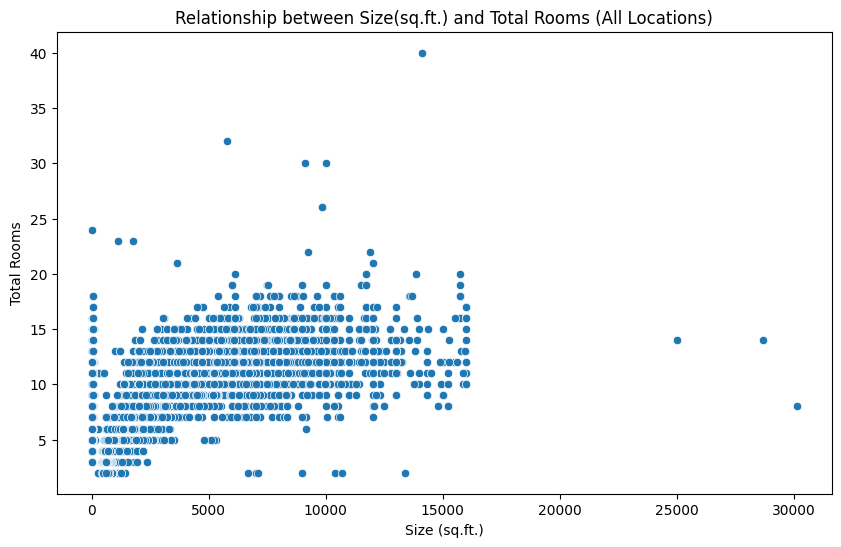

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='Size(sq.ft.)', y='Total Rooms', data=df)
plt.title('Relationship between Size(sq.ft.) and Total Rooms (All Locations)')
plt.xlabel('Size (sq.ft.)')
plt.ylabel('Total Rooms')
plt.show()

#####We will examine the Price vs Total Rooms ratio

In [ ]:
df['Price/Total Rooms'] = df['Price'] / df['Total Rooms']
df.head()

,Location,Price,Property Type,Furnishing,Size Category,Size(sq.ft.),Total Rooms,Price per sqft,Price/Total Rooms
0,Bukit Bintang,1250000.0,Condominium/Serviced Residence,Fully Furnished,Built-Up,1335.0,6,936.329588,208333.333333
2,Segambut,1030000.0,Condominium/Serviced Residence,Partly Furnished,Built-Up,1875.0,7,549.333333,147142.857143
4,Seputeh,900000.0,Condominium/Serviced Residence,Partly Furnished,Built-Up,1513.0,8,594.844679,112500.0
18,Segambut,1780000.0,Condominium/Serviced Residence,Partly Furnished,Built-Up,1830.0,9,972.677596,197777.777778
20,Segambut,1500000.0,Condominium/Serviced Residence,Partly Furnished,Built-Up,1798.0,9,834.260289,166666.666667


In [ ]:
import pandas as pd

def remove_outliers_by_price_persqft(df, target_col='Price', value_col='Price per sqft'):
    """
    Removes outliers from a DataFrame based on the IQR method, considering the
    relationship between 'Price' and 'Price per sqft'.

    Args:
        df: The input DataFrame.
        target_col: The column containing the values to check for outliers (default: 'Price').
        value_col: The column related to the target column (default: 'Price per sqft').

    Returns:
        A new DataFrame with outliers removed.
    """
    cleaned_df = df.copy()
    all_outliers = pd.Series(False, index=cleaned_df.index)

    # Calculate IQR and bounds for 'target_col' based on 'value_col' quantiles
    Q1_value = df[value_col].quantile(0.25)
    Q3_value = df[value_col].quantile(0.75)

    # Filter data for each quantile range
    lower_quantile_group = df[df[value_col] <= Q1_value]
    upper_quantile_group = df[df[value_col] >= Q3_value]

    # Calculate IQR and bounds for 'target_col' in each quantile range
    Q1_lower = lower_quantile_group[target_col].quantile(0.25)
    Q3_lower = lower_quantile_group[target_col].quantile(0.75)
    IQR_lower = Q3_lower - Q1_lower
    lower_bound_lower = Q1_lower - 1.5 * IQR_lower
    upper_bound_lower = Q3_lower + 1.5 * IQR_lower

    Q1_upper = upper_quantile_group[target_col].quantile(0.25)
    Q3_upper = upper_quantile_group[target_col].quantile(0.75)
    IQR_upper = Q3_upper - Q1_upper
    lower_bound_upper = Q1_upper - 1.5 * IQR_upper
    upper_bound_upper = Q3_upper + 1.5 * IQR_upper

    # Identify outliers based on the relationship
    is_outlier = ~ (
        ((df[value_col] <= Q1_value) & (df[target_col] >= lower_bound_lower) & (df[target_col] <= upper_bound_lower)) |
        ((df[value_col] >= Q3_value) & (df[target_col] >= lower_bound_upper) & (df[target_col] <= upper_bound_upper)) |
        ((df[value_col] > Q1_value) & (df[value_col] < Q3_value))  # Keep data within the middle quantile range
    )

    # Update the all_outliers mask
    all_outliers[df[is_outlier].index] = True

    # Remove outliers from the cleaned DataFrame all at once
    cleaned_df = cleaned_df[~all_outliers]

    return cleaned_df

# Create df2 and remove outliers based on 'Price' vs. 'Price per sqft'
df2 = remove_outliers_by_price_persqft(df)

# Calculate and print the correlation between 'Price' and 'Price per sqft' in df2
correlation_df2 = df2['Price'].corr(df2['Price per sqft'])
print(f"Correlation between Price and Price per sqft in df2: {correlation_df2}")

Correlation between Price and Price per sqft in df2: 0.05720218606923179


#####Remove outliers, for each location, each property of the price/Total rooms

In [ ]:
import pandas as pd

def remove_outliers_by_group(df, group_cols, target_col):
    """
    Removes outliers from a DataFrame based on the IQR method, grouped by specified columns.

    Args:
        df: The input DataFrame.
        group_cols: A list of columns to group by.
        target_col: The column containing the values to check for outliers (e.g., 'Price/Total Rooms').

    Returns:
        A new DataFrame with outliers removed.
    """
    # Ensure 'Price/Total Rooms' column is created before outlier removal
    df['Price/Total Rooms'] = df['Price'] / df['Total Rooms']

    for _, group in df.groupby(group_cols):
        # Calculate IQR and bounds for the target column
        Q1 = group[target_col].quantile(0.25)
        Q3 = group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers for the current group
        group_cleaned = group[(group[target_col] >= lower_bound) & (group[target_col] <= upper_bound)]

        # Update the cleaned DataFrame with the cleaned group
        df.loc[group.index, :] = group_cleaned

    return df

# Remove outliers based on 'Price/Total Rooms' for each 'Location' and 'Property Type'
df = remove_outliers_by_group(df, ['Location', 'Property Type'], 'Price/Total Rooms')

# Display the cleaned DataFrame (optional)
print(df.head())
print(f"Shape of DataFrame after removing outliers: {df.shape}")

         Location      Price                   Property Type  \
0   Bukit Bintang  1250000.0  Condominium/Serviced Residence   
2        Segambut  1030000.0  Condominium/Serviced Residence   
4         Seputeh   900000.0  Condominium/Serviced Residence   
18       Segambut  1780000.0  Condominium/Serviced Residence   
20       Segambut  1500000.0  Condominium/Serviced Residence   

          Furnishing Size Category  Size(sq.ft.)  Total Rooms  Price per sqft  \
0    Fully Furnished      Built-Up        1335.0            6      936.329588   
2   Partly Furnished      Built-Up        1875.0            7      549.333333   
4   Partly Furnished      Built-Up        1513.0            8      594.844679   
18  Partly Furnished      Built-Up        1830.0            9      972.677596   
20  Partly Furnished      Built-Up        1798.0            9      834.260289   

    Price/Total Rooms  
0       208333.333333  
2       147142.857143  
4            112500.0  
18      197777.777778  
20      

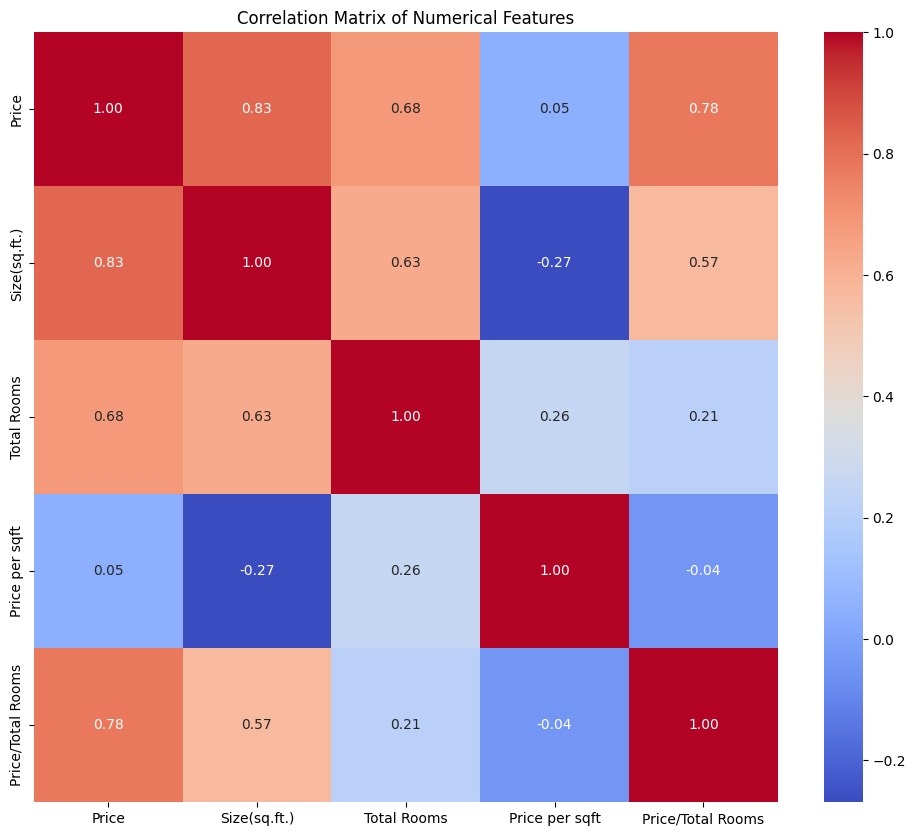

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#####For each location, the more the total rooms, the higher the total price.

#####Now, we are going to build the histogram bar graph for each location, each property type, where the x for each subgraphs = total rooms, y for each subgraph = price

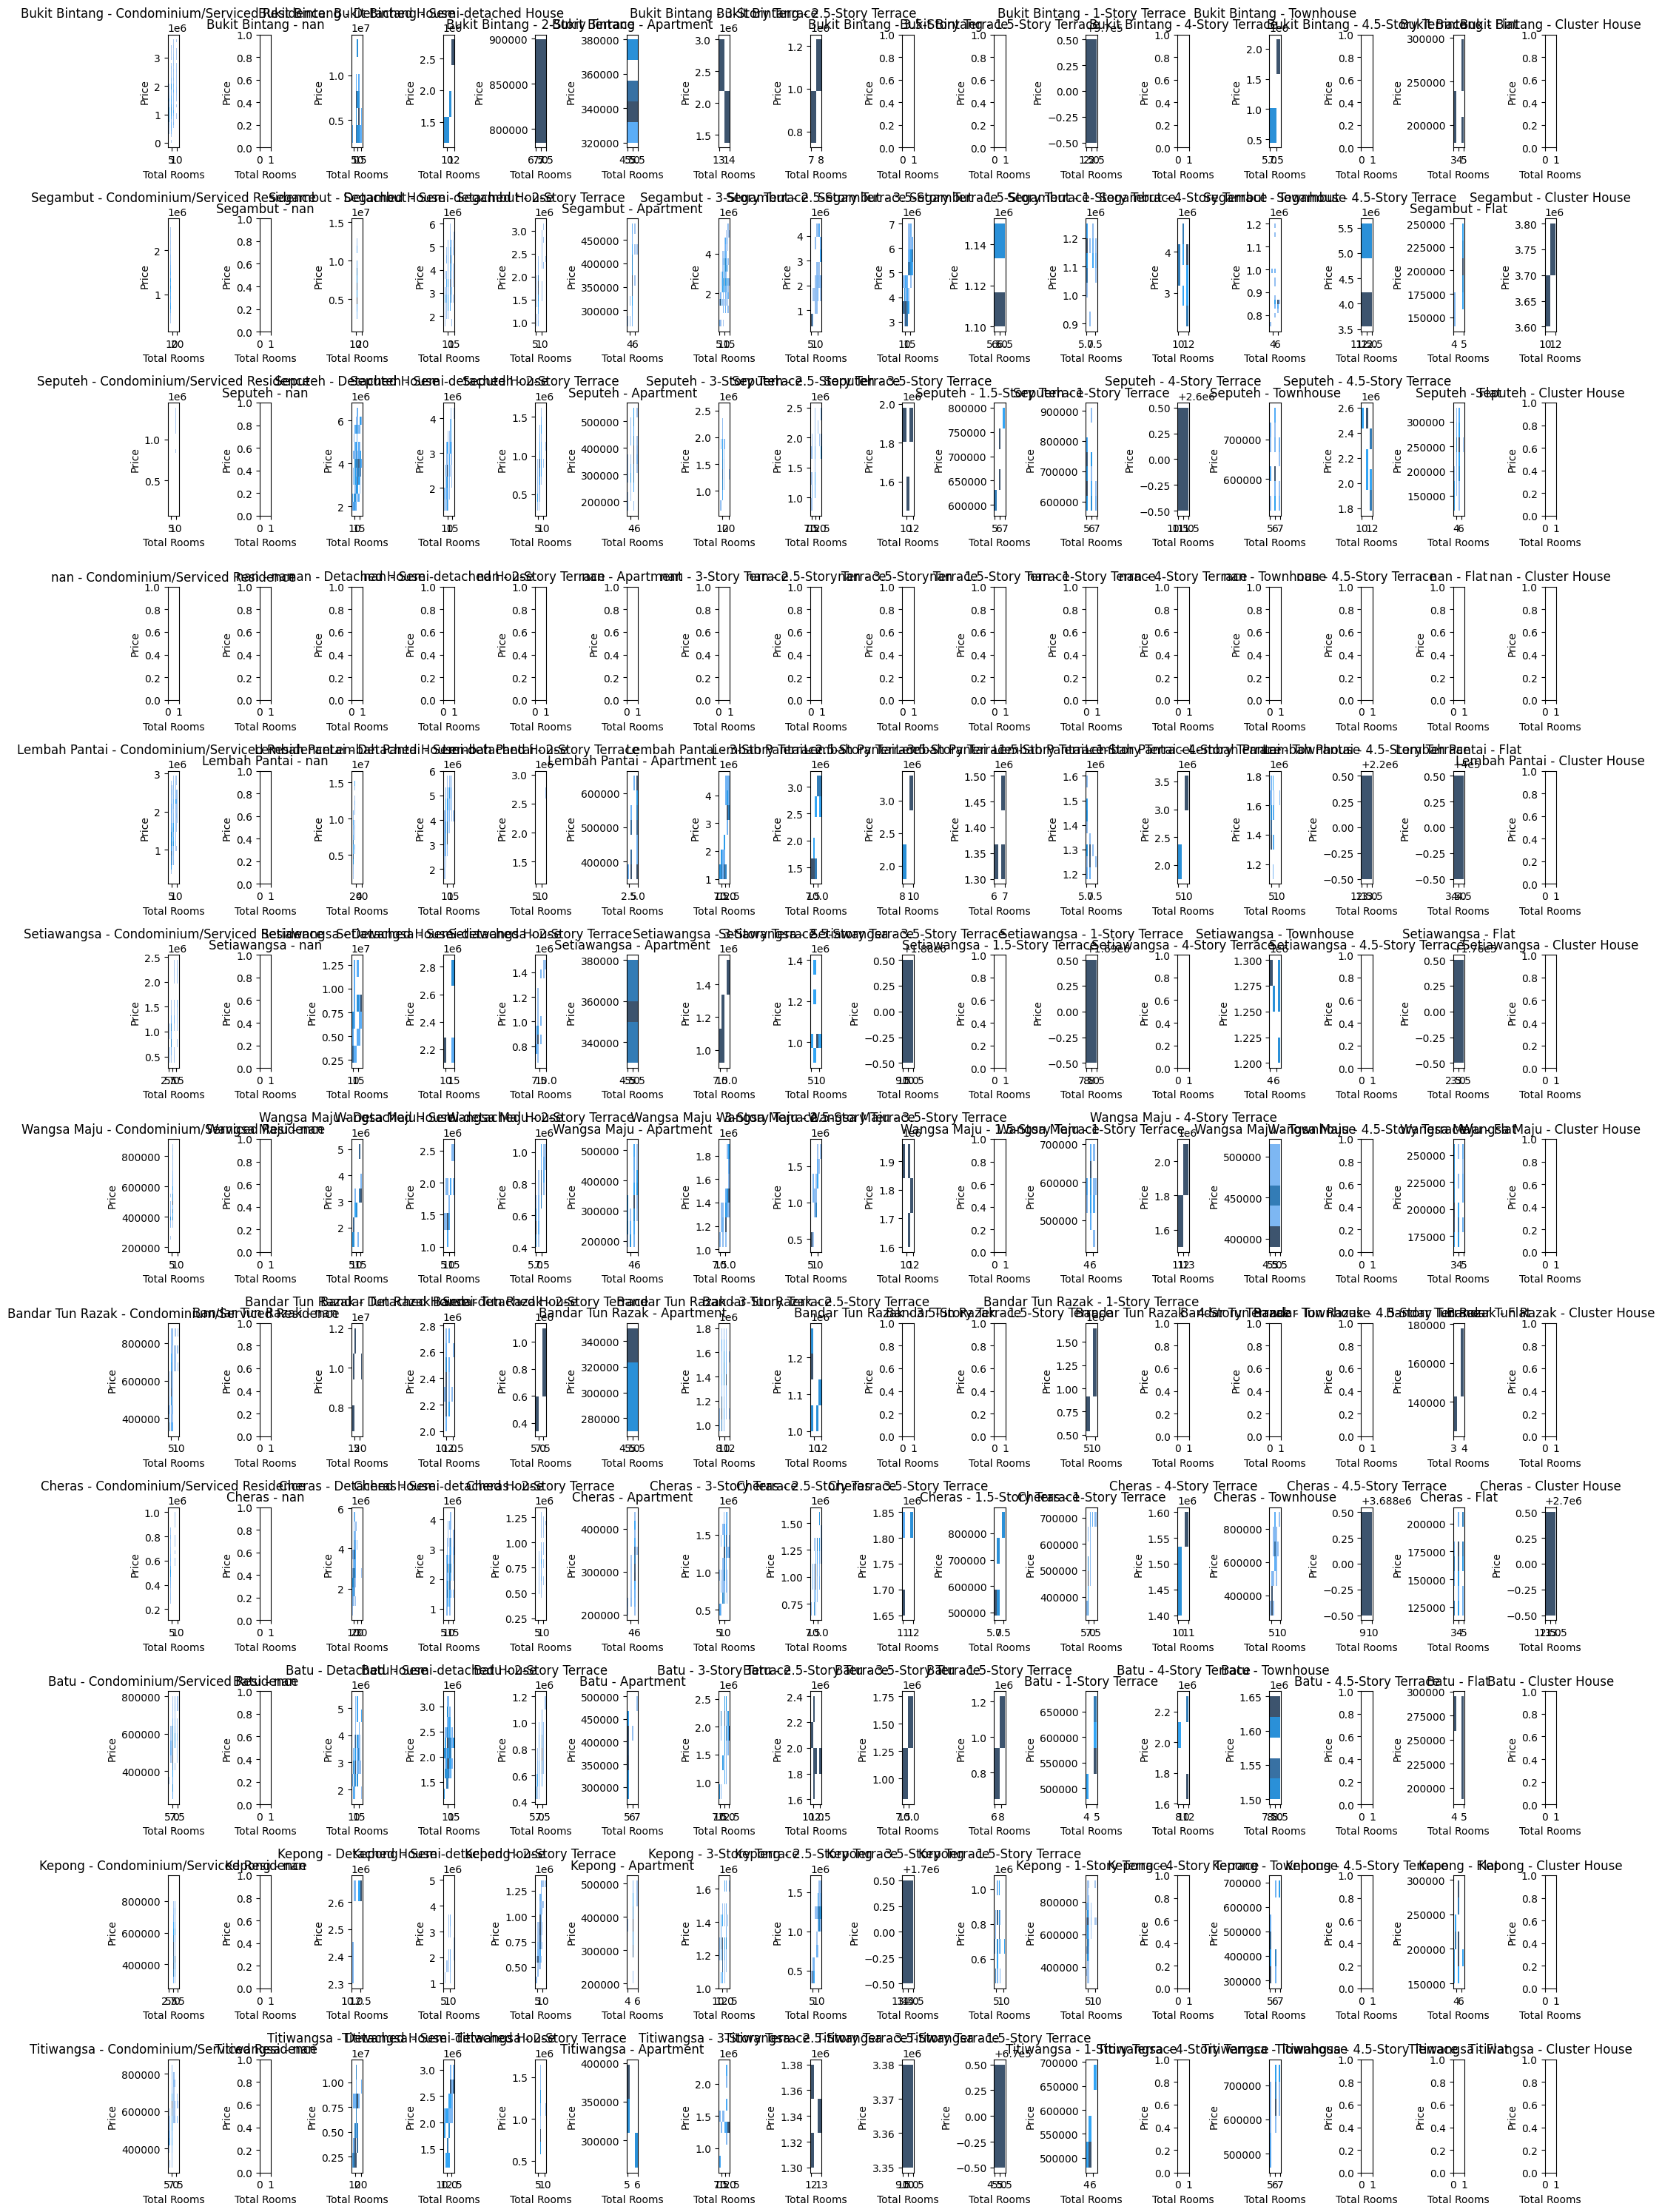

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique locations and property types
locations = df['Location'].unique()
property_types = df['Property Type'].unique()

# Create a grid of subplots
fig, axes = plt.subplots(len(locations), len(property_types), figsize=(20, 30))  # Adjust figsize as needed

# Loop through locations and property types to create plots
for i, location in enumerate(locations):
    for j, property_type in enumerate(property_types):
        # Filter data for the current location and property type
        data = df[(df['Location'] == location) & (df['Property Type'] == property_type)]

        # Create histogram bar plot on the corresponding subplot
        sns.histplot(x='Total Rooms', y='Price', data=data, ax=axes[i, j], bins='auto')  # Adjust bins as needed
        axes[i, j].set_title(f'{location} - {property_type}')
        axes[i, j].set_xlabel('Total Rooms')
        axes[i, j].set_ylabel('Price')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35992 entries, 0 to 25064
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           35065 non-null  object 
 1   Price              35065 non-null  float64
 2   Property Type      35065 non-null  object 
 3   Furnishing         35065 non-null  object 
 4   Size Category      35065 non-null  object 
 5   Size(sq.ft.)       35065 non-null  float64
 6   Total Rooms        35065 non-null  Int64  
 7   Price per sqft     35065 non-null  float64
 8   Price/Total Rooms  35065 non-null  Float64
dtypes: Float64(1), Int64(1), float64(3), object(4)
memory usage: 3.8+ MB


#####Considering price vs price per sqrt, different location may be different price, so now lets do the correlation between price per sqrt vs the each location.

#####The price vs price per sqrt have weak correlation, considering it is due to each location, each property type. Lets build the relationship for that.

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
locations = df['Location'].unique()

for location in locations:
    data = df[df['Location'] == location]  # Filter data for the current location
    correlation = data['Price'].corr(data['Price per sqft'])  # Calculate correlation
    print(f"Location: {location}, Correlation between Price and Price per sqft: {correlation}")

Location: Bukit Bintang, Correlation between Price and Price per sqft: 0.08426019711921917
Location: Segambut, Correlation between Price and Price per sqft: 0.1442112722681668
Location: Seputeh, Correlation between Price and Price per sqft: 0.2315088327953997
Location: nan, Correlation between Price and Price per sqft: nan
Location: Lembah Pantai, Correlation between Price and Price per sqft: -0.07188045183684719
Location: Setiawangsa, Correlation between Price and Price per sqft: -0.041276241544230145
Location: Wangsa Maju, Correlation between Price and Price per sqft: 0.30871585440792076
Location: Bandar Tun Razak, Correlation between Price and Price per sqft: 0.2573261888877209
Location: Cheras, Correlation between Price and Price per sqft: 0.1843367669429572
Location: Batu, Correlation between Price and Price per sqft: 0.15792557899114334
Location: Kepong, Correlation between Price and Price per sqft: 0.5436639517083502
Location: Titiwangsa, Correlation between Price and Price per 

#####Realising for each price per sqft actually affected by the each location, each property type, therefore we will just remain the price per sqft column.

####In general, the price of furnished houses > partly furnished > unfurnished(If same property price, same location, total rooms)

#####CLean the data with those who didnt obey that rule

In [ ]:
df_no_outliers = df

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df_no_outliers'

# Create a copy of the DataFrame to avoid modifying the original
filtered_df = df_no_outliers.copy()

# Group by Location, Property Type and Total Rooms
grouped = filtered_df.groupby(['Location', 'Property Type', 'Total Rooms'])

# Iterate through groups and remove rows based on conditions
# Keep track of indexes to drop
indexes_to_drop = []

for name, group in grouped:
    fully_furnished_price = group[group['Furnishing'] == 'Fully Furnished']['Price'].min()
    partly_furnished_price = group[group['Furnishing'] == 'Partly Furnished']['Price'].min()
    unfurnished_price = group[group['Furnishing'] == 'Unfurnished']['Price'].min()

    # Collect indexes to drop instead of dropping immediately
    if pd.notna(fully_furnished_price) and pd.notna(unfurnished_price) and unfurnished_price > fully_furnished_price:
        indexes_to_drop.extend(group[(group['Furnishing'] == 'Unfurnished') & (group['Price'] > fully_furnished_price)].index)
    if pd.notna(fully_furnished_price) and pd.notna(partly_furnished_price) and partly_furnished_price > fully_furnished_price:
        indexes_to_drop.extend(group[(group['Furnishing'] == 'Partly Furnished') & (group['Price'] > fully_furnished_price)].index)
    if pd.notna(partly_furnished_price) and pd.notna(unfurnished_price) and unfurnished_price > partly_furnished_price:
        indexes_to_drop.extend(group[(group['Furnishing'] == 'Unfurnished') & (group['Price'] > partly_furnished_price)].index)

# Drop all collected indexes at once outside the loop
filtered_df = filtered_df.drop(indexes_to_drop)

# Display the filtered DataFrame (optional)
print(filtered_df)

            Location      Price                   Property Type  \
0      Bukit Bintang  1250000.0  Condominium/Serviced Residence   
2           Segambut  1030000.0  Condominium/Serviced Residence   
18          Segambut  1780000.0  Condominium/Serviced Residence   
20          Segambut  1500000.0  Condominium/Serviced Residence   
21               NaN        NaN                             NaN   
...              ...        ...                             ...   
49897  Bukit Bintang  7990000.0                  Detached House   
50356         Cheras  3000000.0                  Detached House   
12534         Cheras  2700000.0                   Cluster House   
16095       Segambut  3800000.0                   Cluster House   
25064       Segambut  3600000.0                   Cluster House   

             Furnishing Size Category  Size(sq.ft.)  Total Rooms  \
0       Fully Furnished      Built-Up        1335.0            6   
2      Partly Furnished      Built-Up        1875.0        

####Build up vs land area, check the average, for each property type, for each location. (EDA, data reduction)

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'filtered_df'
# (from the previous response where outliers were removed)

# Get unique locations
locations = filtered_df['Location'].unique()

# Loop through locations and calculate/compare average prices
for location in locations:
    # Filter data for the current location
    location_data = filtered_df[filtered_df['Location'] == location]

    # Calculate average price for 'Built-Up' properties in the location
    average_built_up_price = location_data[location_data['Size Category'] == 'Built-Up']['Price'].mean()

    # Calculate average price for 'Land Area' properties in the location
    average_land_area_price = location_data[location_data['Size Category'] == 'Land Area']['Price'].mean()

    # Print the results for the location
    print(f"Location: {location}")
    print(f"  Average Price for Built-Up Properties: {average_built_up_price:.2f}")
    print(f"  Average Price for Land Area Properties: {average_land_area_price:.2f}")

    # Compare the average prices for the location
    if average_built_up_price > average_land_area_price:
        print("  Built-Up properties have a higher average price in this location.")
    elif average_built_up_price < average_land_area_price:
        print("  Land Area properties have a higher average price in this location.")
    else:
        print("  Built-Up and Land Area properties have the same average price in this location.")

    print("-" * 30)  # Separator for better readability

Location: Bukit Bintang
  Average Price for Built-Up Properties: 1437709.05
  Average Price for Land Area Properties: 1790117.18
  Land Area properties have a higher average price in this location.
------------------------------
Location: Segambut
  Average Price for Built-Up Properties: 1233875.23
  Average Price for Land Area Properties: 3313309.93
  Land Area properties have a higher average price in this location.
------------------------------
Location: nan
  Average Price for Built-Up Properties: nan
  Average Price for Land Area Properties: nan
  Built-Up and Land Area properties have the same average price in this location.
------------------------------
Location: Lembah Pantai
  Average Price for Built-Up Properties: 1403753.89
  Average Price for Land Area Properties: 5832914.05
  Land Area properties have a higher average price in this location.
------------------------------
Location: Seputeh
  Average Price for Built-Up Properties: 619219.32
  Average Price for Land Area P

#####Land area is more expensive, remove rows that are more expensive with build area, if property type, location and total rooms are the same.

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'filtered_df'
# (from the previous response where outliers were removed)

# Create a copy of the DataFrame to avoid modifying the original
filtered_df2 = filtered_df.copy()

# Group by Location, Property Type, and Total Rooms
grouped = filtered_df2.groupby(['Location', 'Property Type', 'Total Rooms'])

# Iterate through groups and remove rows based on conditions
# Keep track of indexes to drop
indexes_to_drop = []

for name, group in grouped:
    built_up_price = group[group['Size Category'] == 'Built-Up']['Price'].min()
    land_area_price = group[group['Size Category'] == 'Land Area']['Price'].min()

    # Collect indexes to drop instead of dropping immediately
    if pd.notna(built_up_price) and pd.notna(land_area_price) and built_up_price > land_area_price:
        indexes_to_drop.extend(group[(group['Size Category'] == 'Built-Up') & (group['Price'] > land_area_price)].index)

# Drop all collected indexes at once outside the loop
filtered_df2 = filtered_df2.drop(indexes_to_drop)

# Display the filtered DataFrame (optional)
print(filtered_df2)

            Location      Price                   Property Type  \
0      Bukit Bintang  1250000.0  Condominium/Serviced Residence   
2           Segambut  1030000.0  Condominium/Serviced Residence   
18          Segambut  1780000.0  Condominium/Serviced Residence   
20          Segambut  1500000.0  Condominium/Serviced Residence   
21               NaN        NaN                             NaN   
...              ...        ...                             ...   
49897  Bukit Bintang  7990000.0                  Detached House   
50356         Cheras  3000000.0                  Detached House   
12534         Cheras  2700000.0                   Cluster House   
16095       Segambut  3800000.0                   Cluster House   
25064       Segambut  3600000.0                   Cluster House   

             Furnishing Size Category  Size(sq.ft.)  Total Rooms  \
0       Fully Furnished      Built-Up        1335.0            6   
2      Partly Furnished      Built-Up        1875.0        

###Data Transformation - 3

#####Normalization

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming your DataFrame is named 'filtered_df2'
# (from the previous response where outliers were removed)

# Select numerical features for scaling/normalization
numerical_features = ['Size(sq.ft.)', 'Price', 'Price per sqft', 'Total Rooms', 'Price/Total Rooms']

# Create a copy of the DataFrame to avoid modifying the original
scaled_df = filtered_df2.copy()

# Min-Max Scaling
scaler = MinMaxScaler()
scaled_df[numerical_features] = scaler.fit_transform(scaled_df[numerical_features])

# Normalization (Standardization)
# Create a new DataFrame for normalized data to keep both versions
normalized_df = filtered_df2.copy()
normalizer = StandardScaler()
normalized_df[numerical_features] = normalizer.fit_transform(normalized_df[numerical_features])

# Display the scaled and normalized DataFrames (optional)
print("Scaled DataFrame:")
print(scaled_df.head())
print("\nNormalized DataFrame:")
print(normalized_df.head())

Scaled DataFrame:
         Location     Price                   Property Type        Furnishing  \
0   Bukit Bintang  0.077978  Condominium/Serviced Residence   Fully Furnished   
2        Segambut  0.064132  Condominium/Serviced Residence  Partly Furnished   
18       Segambut  0.111335  Condominium/Serviced Residence  Partly Furnished   
20       Segambut  0.093713  Condominium/Serviced Residence  Partly Furnished   
21            NaN       NaN                             NaN               NaN   

   Size Category  Size(sq.ft.)  Total Rooms  Price per sqft  Price/Total Rooms  
0       Built-Up      0.046172     0.105263        0.004161           0.147470  
2       Built-Up      0.065017     0.131579        0.002428           0.103694  
18      Built-Up      0.063447     0.184211        0.004324           0.139918  
20      Built-Up      0.062330     0.184211        0.003704           0.117661  
21           NaN           NaN          NaN             NaN                NaN  

Normaliz

#####MinMaxScaler

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Assuming your DataFrame is named 'filtered_df2'

# Select numerical features for scaling
numerical_features = ['Size(sq.ft.)', 'Price', 'Price per sqft', 'Total Rooms', 'Price/Total Rooms']

# Create a copy of the DataFrame to avoid modifying the original
scaled_df = filtered_df2.copy()

# Imputation before scaling
imputer = SimpleImputer(strategy='median')  # Or other strategy like 'median'
scaled_df[numerical_features] = imputer.fit_transform(scaled_df[numerical_features])

# Min-Max Scaling (after imputation)
scaler = MinMaxScaler()
scaled_df[numerical_features] = scaler.fit_transform(scaled_df[numerical_features])

# Display the scaled DataFrame (optional)
print("Scaled DataFrame:")
print(scaled_df.head())

# Check for NaN values after scaling
print("\nNaN values after scaling:")
print(scaled_df.isna().sum())

Scaled DataFrame:
         Location     Price                   Property Type        Furnishing  \
0   Bukit Bintang  0.077978  Condominium/Serviced Residence   Fully Furnished   
2        Segambut  0.064132  Condominium/Serviced Residence  Partly Furnished   
18       Segambut  0.111335  Condominium/Serviced Residence  Partly Furnished   
20       Segambut  0.093713  Condominium/Serviced Residence  Partly Furnished   
21            NaN  0.052804                             NaN               NaN   

   Size Category  Size(sq.ft.)  Total Rooms  Price per sqft  Price/Total Rooms  
0       Built-Up      0.046172     0.105263        0.004161           0.147470  
2       Built-Up      0.065017     0.131579        0.002428           0.103694  
18      Built-Up      0.063447     0.184211        0.004324           0.139918  
20      Built-Up      0.062330     0.184211        0.003704           0.117661  
21           NaN      0.039960     0.078947        0.003135           0.108599  

NaN valu

In [ ]:
scaled_df.dropna()

,Location,Price,Property Type,Furnishing,Size Category,Size(sq.ft.),Total Rooms,Price per sqft,Price/Total Rooms
0,Bukit Bintang,0.077978,Condominium/Serviced Residence,Fully Furnished,Built-Up,0.046172,0.105263,0.004161,0.147470
2,Segambut,0.064132,Condominium/Serviced Residence,Partly Furnished,Built-Up,0.065017,0.131579,0.002428,0.103694
18,Segambut,0.111335,Condominium/Serviced Residence,Partly Furnished,Built-Up,0.063447,0.184211,0.004324,0.139918
20,Segambut,0.093713,Condominium/Serviced Residence,Partly Furnished,Built-Up,0.062330,0.184211,0.003704,0.117661
22,Segambut,0.093713,Condominium/Serviced Residence,Fully Furnished,Built-Up,0.075068,0.157895,0.003074,0.132565
...,...,...,...,...,...,...,...,...,...
49897,Bukit Bintang,0.502171,Detached House,Unfurnished,Land Area,0.288441,0.184211,0.004291,0.633551
50356,Cheras,0.188118,Detached House,Fully Furnished,Land Area,0.318210,0.736842,0.001440,0.069967
12534,Cheras,0.169237,Cluster House,Partly Furnished,Land Area,0.001326,0.289474,0.241743,0.147011
16095,Segambut,0.238467,Cluster House,Partly Furnished,Land Area,0.000384,0.263158,0.739696,0.224973


In [ ]:
scaled_df.isna().sum()

,0
Location,927
Price,0
Property Type,927
Furnishing,927
Size Category,927
Size(sq.ft.),0
Total Rooms,0
Price per sqft,0
Price/Total Rooms,0


#####In the end we select MinMaxScaler since it has the range of (0 to max), which can remove more outliers.

#####Final checking before exporting clean data.

In [ ]:
final_df = scaled_df.copy()  # Create a copy of df to avoid modifying the original

In [ ]:
final_df.isna().sum()

,0
Location,927
Price,0
Property Type,927
Furnishing,927
Size Category,927
Size(sq.ft.),0
Total Rooms,0
Price per sqft,0
Price/Total Rooms,0


In [ ]:
final_df.head()

,Location,Price,Property Type,Furnishing,Size Category,Size(sq.ft.),Total Rooms,Price per sqft,Price/Total Rooms
0,Bukit Bintang,0.077978,Condominium/Serviced Residence,Fully Furnished,Built-Up,0.046172,0.105263,0.004161,0.147470
2,Segambut,0.064132,Condominium/Serviced Residence,Partly Furnished,Built-Up,0.065017,0.131579,0.002428,0.103694
18,Segambut,0.111335,Condominium/Serviced Residence,Partly Furnished,Built-Up,0.063447,0.184211,0.004324,0.139918
20,Segambut,0.093713,Condominium/Serviced Residence,Partly Furnished,Built-Up,0.062330,0.184211,0.003704,0.117661
21,NaN,0.052804,NaN,NaN,NaN,0.039960,0.078947,0.003135,0.108599


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30588 entries, 0 to 25064
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           29661 non-null  object 
 1   Price              30588 non-null  float64
 2   Property Type      29661 non-null  object 
 3   Furnishing         29661 non-null  object 
 4   Size Category      29661 non-null  object 
 5   Size(sq.ft.)       30588 non-null  float64
 6   Total Rooms        30588 non-null  float64
 7   Price per sqft     30588 non-null  float64
 8   Price/Total Rooms  30588 non-null  float64
dtypes: float64(5), object(4)
memory usage: 2.3+ MB


####There are four categorical data location, property type, furnishing and size category.

#### All we make them into True and False, and then drop all these categorical data.

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'scaled_df'

# Get a list of categorical features
categorical_features = ['Location', 'Property Type', 'Furnishing', 'Size Category']

# Perform one-hot encoding
encoded_df = pd.get_dummies(scaled_df, columns=categorical_features, drop_first=True, dtype=int)
# dtype=int ensures the encoded columns are integers (True/False represented as 1/0)
# drop_first=True avoids multicollinearity by dropping one level from each categorical feature

# Drop the original categorical columns
final_df = encoded_df.drop(categorical_features, axis=1, errors='ignore')
# errors='ignore' to handle cases where a column might have already been dropped

# Display the final DataFrame
print(final_df.head())

       Price  Size(sq.ft.)  Total Rooms  Price per sqft  Price/Total Rooms  \
0   0.077978      0.046172     0.105263        0.004161           0.147470   
2   0.064132      0.065017     0.131579        0.002428           0.103694   
18  0.111335      0.063447     0.184211        0.004324           0.139918   
20  0.093713      0.062330     0.184211        0.003704           0.117661   
21  0.052804      0.039960     0.078947        0.003135           0.108599   

    Location_Batu  Location_Bukit Bintang  Location_Cheras  Location_Kepong  \
0               0                       1                0                0   
2               0                       0                0                0   
18              0                       0                0                0   
20              0                       0                0                0   
21              0                       0                0                0   

    Location_Lembah Pantai  ...  Property Type_Apartment

###Data Integration

###We do not need integration as we do not have more than one dataset.

In [ ]:
final_df.head()

,Price,Size(sq.ft.),Total Rooms,Price per sqft,Price/Total Rooms,Location_Batu,Location_Bukit Bintang,Location_Cheras,Location_Kepong,Location_Lembah Pantai,...,Property Type_Apartment,Property Type_Cluster House,Property Type_Condominium/Serviced Residence,Property Type_Detached House,Property Type_Flat,Property Type_Semi-detached House,Property Type_Townhouse,Furnishing_Partly Furnished,Furnishing_Unfurnished,Size Category_Land Area
0,0.077978,0.046172,0.105263,0.004161,0.147470,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.064132,0.065017,0.131579,0.002428,0.103694,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
18,0.111335,0.063447,0.184211,0.004324,0.139918,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
20,0.093713,0.062330,0.184211,0.003704,0.117661,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
21,0.052804,0.039960,0.078947,0.003135,0.108599,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_df.isna().sum()

,0
Price,0
Size(sq.ft.),0
Total Rooms,0
Price per sqft,0
Price/Total Rooms,0
Location_Batu,0
Location_Bukit Bintang,0
Location_Cheras,0
Location_Kepong,0
Location_Lembah Pantai,0


## Export Cleaned Data

In [ ]:
# export the df_cleaned to 'balanced_cleaned_credit_card_data.csv'

final_df.to_csv('cleaned_data_for_ml.csv', index=False)

# 4. Model Selection:
Once your data is ready, you will need to choose an appropriate machine
learning algorithm for your project. You may choose from supervised or unsupervised
learning, and select the model based on the problem you are trying to solve.

## Splitting Train and Test Data

#####We split to 75% train data and 25% test data.

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Read the preprocessed and cleaned dataset
# The 'Price' column is not the first column, so no need to specify index_col
X = pd.read_csv('cleaned_data_for_ml.csv')

#Extract the target variable ('Price') and set it as variable 'y'
y = X.pop('Price')  # Now 'Price' is accessible as a regular column

#Split dataset into training and testing sets
#75% data used for training, 25% used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Determining Best Model

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
# Import all the necessary libraries for machine learning regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor  # Assumes you have installed xgboost (pip install xgboost)
from sklearn.metrics import mean_squared_error, r2_score

# Create a list of regression models
regression_model_class = [
    LinearRegression,
    DecisionTreeRegressor,
    RandomForestRegressor,
    XGBRegressor,
]

# Model performance dictionary to store the results
model_performance = {
    'ModelName': ['LinearRegression',
                  'DecisionTreeRegressor',
                  'RandomForestRegressor',
                  'XGBRegressor'],
    'Model': [],
    'R-squared': [],  # Use R-squared for regression
    'RMSE': [],
}

# Loop through each regression model class
for ModelClass in regression_model_class:
    # Create model with specified arguments
    args = {'random_state': 161223} if ModelClass != LinearRegression else {}  # Handle XGBoost case
    model = ModelClass(**args)

    # Train data on model
    model.fit(X_train, y_train)

    # Model prediction using the trained model
    y_pred = model.predict(X_test)

    # Evaluation scoring
    model_performance['Model'].append(model)
    model_performance['R-squared'].append(r2_score(y_test, y_pred))  # Calculate R-squared
    model_performance['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Create DataFrame from the model performance dictionary
model_performance_df = pd.DataFrame(model_performance)
print(model_performance_df)

               ModelName                                              Model  \
0       LinearRegression                                 LinearRegression()   
1  DecisionTreeRegressor         DecisionTreeRegressor(random_state=161223)   
2  RandomForestRegressor  (DecisionTreeRegressor(max_features=1.0, rando...   
3           XGBRegressor  XGBRegressor(base_score=None, booster=None, ca...   

   R-squared      RMSE  
0   0.934853  0.025652  
1   0.994055  0.007749  
2   0.996208  0.006189  
3   0.997264  0.005257  


Text(0.5, 1.0, 'RMSE')

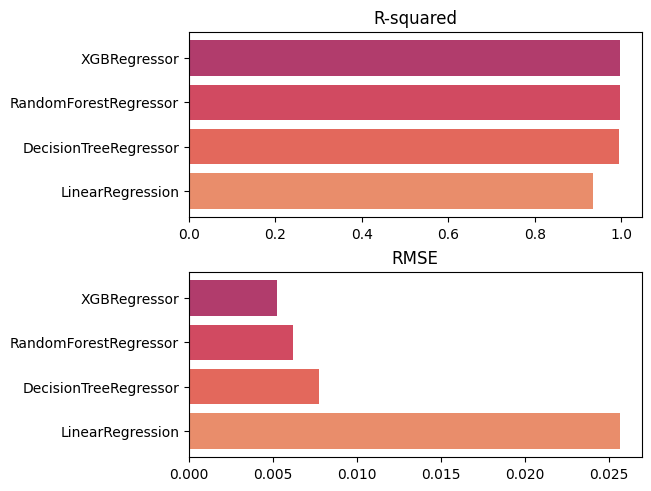

In [ ]:
# Visualize model performa nce by creating two subplots ax1 and ax2
fig, (ax1, ax2) = plt.subplots(2, layout='constrained')

#Arrange the models from lowest to highest R-squared for better visualization.
model_performance_df.sort_values(by='R-squared', inplace=True)
#Horizontal bar chart is created on the first subplot (ax1). ( y-axis: 'ModelName', x-axis : 'R-squared')
ax1.barh(model_performance_df['ModelName'], model_performance_df['R-squared'], color=sns.color_palette('flare'))
#Set title of subplot ax1
ax1.set_title('R-squared')

#Arrange the models from highest to lowest RMSE for better visualization.
model_performance_df.sort_values(by='RMSE', ascending=False, inplace=True)
#Horizontal bar chart is created on the second subplot (ax2). ( y-axis: 'ModelName', x-axis : 'RMSE')
ax2.barh(model_performance_df['ModelName'], model_performance_df['RMSE'], color=sns.color_palette('flare'))
#Set title of subplot ax2
ax2.set_title('RMSE')

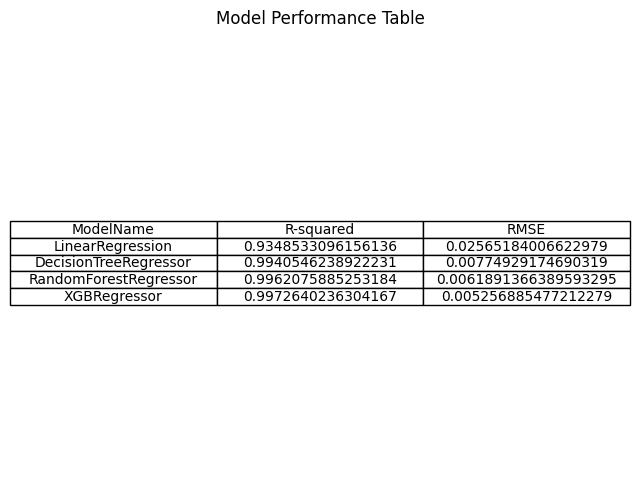

In [ ]:
import matplotlib.pyplot as plt

# Arrange the models from lowest to highest R-squared for better visualization.
model_performance_df.sort_values(by='R-squared', inplace=True)

# Create a figure and axis for the table
fig, ax = plt.subplots(figsize=(8, 6))

# Display the table in ascending order of R-squared
table_data = model_performance_df[['ModelName', 'R-squared', 'RMSE']]
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)

# Remove axes for better visualization
ax.axis('off')

plt.title('Model Performance Table')
plt.show()

##Selected Model


####Since the R-squared for RandomForestRegressor is the highest and the RMSE value is the lowest, RandomForestRegressor is the best performing model. Without further ado, We will choose RandomForestRegressor for our model.

In [ ]:
import sklearn.ensemble  # Import the ensemble module
import matplotlib.pyplot as plt
import sklearn.tree # DecisionTreeClassifier is in sklearn.tree

# Train the model
#model = sklearn.ensemble.DecisionTreeClassifier()  # Use the correct path to DecisionTreeClassifier
model = sklearn.tree.DecisionTreeRegressor() # Use DecisionTreeRegressor for regression
model.fit(X_train, y_train)

# Visualize the tree
fig = plt.figure(figsize=(18, 16))
sklearn.tree.plot_tree(model, filled=True) # plot_tree takes the trained model
plt.show()

KeyboardInterrupt: 

# 5. Model Training and Evaluation
Once the model is selected, it needs to be trained on the preprocessed data, and its performance should be evaluated using appropriate metrics. The model can be fine-tuned to improve its performance through Hyperparameter Tuning.

## Hyperparameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeRegressor # Changed from DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': range(1, 10),
}

# Create an instance of GridSearchCV with DecisionTreeRegressor, searching over the specified parameter grid
# Using 4-fold cross-validation and R-squared as the scoring metric
clf = GridSearchCV(DecisionTreeRegressor(), param_grid=params, scoring='r2', cv=4) # Changed estimator to DecisionTreeRegressor

# Fit the GridSearchCV instance on the training data to find the best hyperparameters
clf.fit(X_train, y_train)

# Display the best hyperparameters and corresponding best R-squared score
clf.best_params_, clf.best_score_

({'max_depth': 9}, 0.9944827577613822)

The first hyperparameter values found were {'max_depth': 9} with a corresponding best R-squared score of approximately 0.9976078732260758.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [9],
    'min_samples_split': range(2, 11),
    'min_samples_leaf': [i for i in range(1, 10)],
    'ccp_alpha': [i/10.0 for i in range(0, 10)]
}

# Use DecisionTreeRegressor for regression tasks
clf = GridSearchCV(DecisionTreeRegressor(), param_grid=params, scoring='r2', cv=4)

# Fit the model
clf.fit(X_train, y_train)

# Display results
clf.best_params_, clf.best_score_

({'ccp_alpha': 0.0,
  'max_depth': 9,
  'min_samples_leaf': 1,
  'min_samples_split': 3},
 0.9947722537656702)

We can extend the GridSearch to include additional hyperparameters: 'max_depth','min_samples_split', 'min_samples_leaf', and 'ccp_alpha'.

The best hyperparameter values found in this case were {'ccp_alpha': 0.0, 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3} with a corresponding best accuracy score of approximately 0.9947722537656702.

In [ ]:
model.score(X_test, y_test)

0.9962796089493073

The best hyperparameters found during the tuning process are utilized for training the random forest model as shown above.

## Experimenting

Make a df copy and try a different normalisation technique to observe the change in accuracy

In [ ]:
df_normStandardScaler = final_df.copy()

In this case, we choose standard scaler as another method to normalise the data as our previous normalised data is using min max scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler
scaler = StandardScaler()

# Create a copy of the DataFrame for standardization
df_normstandard = scaled_df.copy()

# Perform standardization on selected 3 columns
df_normstandard[['Price', 'Price per sqft', 'Price/Total Rooms']] = scaler.fit_transform(df_normstandard[['Price', 'Price per sqft', 'Price/Total Rooms']])

# Display the first 5 rows of the standardized DataFrame
df_normstandard.head()

,Location,Price,Property Type,Furnishing,Size Category,Size(sq.ft.),Total Rooms,Price per sqft,Price/Total Rooms
0,Bukit Bintang,-0.070575,Condominium/Serviced Residence,Fully Furnished,Built-Up,0.046172,0.105263,-0.296246,0.046656
2,Segambut,-0.208253,Condominium/Serviced Residence,Partly Furnished,Built-Up,0.065017,0.131579,-0.317454,-0.384015
18,Segambut,0.261104,Condominium/Serviced Residence,Partly Furnished,Built-Up,0.063447,0.184211,-0.294254,-0.027636
20,Segambut,0.085877,Condominium/Serviced Residence,Partly Furnished,Built-Up,0.062330,0.184211,-0.301840,-0.246603
21,NaN,-0.320898,NaN,NaN,NaN,0.039960,0.078947,-0.308802,-0.335753


In [ ]:
from sklearn.model_selection import train_test_split
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_exp, test_size=0.2)

In [ ]:
!pip install scikit-learn

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  # Use Regressor
import numpy as np

# ... (Your existing code for data preparation - up to df_encoded creation) ...

# One-Hot Encoding for categorical features
categorical_features = ['Location', 'Property Type', 'Furnishing', 'Size Category']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # handle_unknown='ignore' to avoid errors with unseen values during prediction
encoded_data = encoder.fit_transform(df[['Location', 'Property Type', 'Furnishing', 'Size Category']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Combine encoded features with numerical features
numerical_features = ['Price', 'Size(sq.ft.)', 'Total Rooms', 'Price per sqft', 'Price/Total Rooms']
final_df = pd.concat([df[numerical_features], encoded_df], axis=1)


# Define features (X) and target (y)
X_exp = final_df.drop(columns=['Price'])  # Remove 'Price' from features
y_exp = final_df['Price']  # Target is 'Price'

# Handle NaN values in y_exp (if any)
y_exp = y_exp.fillna(y_exp.median())

# Split data into training and testing sets
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_exp, test_size=0.2, random_state=42)  # random_state for reproducibility


# Create and train a DecisionTreeRegressor
model_exp = DecisionTreeRegressor(ccp_alpha=0.0, max_depth=9, min_samples_leaf=1, min_samples_split=3, random_state=42)  # random_state for reproducibility
model_exp.fit(X_train_exp, y_train_exp)

# ... (Rest of your code for model evaluation, etc.) ...

In [ ]:
model_exp.score(X_test_exp, y_test_exp)

In [ ]:
# a table to compare the accuracy value of model.score and model_exp.score

model_score = model.score(X_test, y_test)
model_exp_score = model_exp.score(X_test_exp, y_test_exp)

table = pd.DataFrame({'Model': ['Decision Tree (Min Max Scaler)', 'Decision Tree (Standard Scaler)'],
                     'r2': [model_score, model_exp_score]})

table


## Pipelining

Since our data is preprocessed before entering into our ML model, we can create a pipeline. This allow us to generalize a dataset input from data preprocess to the ML model prediction and receive a output.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

# Create Pipeline
pipeline = Pipeline(steps=[
    ('model', DecisionTreeClassifier(random_state=161223, **clf.best_params_)),
])

In [ ]:
pipeline

## Export Pipeline

Now we can export our pipeline for deployment using `joblib` library.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
import joblib

# 1. Define your pipeline
pipeline = Pipeline(steps=[
    ('model', DecisionTreeRegressor(random_state=161223, **clf.best_params_))
])

# 2. Fit the pipeline using your training data (X_train, y_train)
pipeline.fit(X_train, y_train)  # This is essential

# 3. Save the trained pipeline for deployment
joblib.dump(pipeline, 'pipeline.pkl')

## Load Pipeline

We can load our pipeline and predict it with our new test data to see if it works as expected.

In [ ]:
# Load the pre-trained machine learning pipeline
pipeline_loaded = joblib.load('pipeline.pkl')

# Calculate the accuracy score of the model
pipeline_loaded.score(X_test, y_test)

As what we expect, our pipeline is able to preprocess the data correctly and give us a fairly accurate result.

# 6. Final deliverable
Finally, you will need to present your findings and results in a clear and
concise manner. You must submit a Google drive link to your files . Please make grant access for me to view and assess your work. In the Google drive link, you must have:



(i) A report (word document) of max 8 pages with

(1) Introduction

(2) Background of the Problem

(3) Data Preprocessing (with Table 1 and Table 2)

(4) EDA (your questions here)

(5) Machine Learning models

(6) Results

(7) Conclusion.

(ii) A link to your Google Colab codes.

(iii) A poster presentation (Just one page).

It must contain:

(1) The problem

(2) The dataset

(3) The Insights (Asking Questions)

(4) The Machine Learning Models and Methods

(5) Results and Conclusion

#Evaluation


The accuracy of the model is 0.9999930434782609. This shows that the accuracy of the trained model is impressively high, achieving a score of approximately 99.9993%.This high accuracy suggests that the model performs exceptionally well.